TEAM 9 - DSEM MID TERM PROJECT - PRUDENTIAL LIFE INSURANCE ASSESSMENT


Importing all the libraries

In [49]:
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree
import xgboost as xgb
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
import warnings
import missingno as msno
from sklearn.svm import SVC
from statsmodels.api import OLS
from xgboost import XGBRegressor  
import statsmodels.api as sm
from google.colab import files

warnings.simplefilter('ignore')
import os
plt.style.use('bmh')
plt.style.use('Solarize_Light2')

Reading the training dataset and analysing the data

In [50]:
train_df = pd.read_csv('/content/train.csv', index_col='Id', on_bad_lines='skip')
train_df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


Visualizing the Risk value counts in the Response column

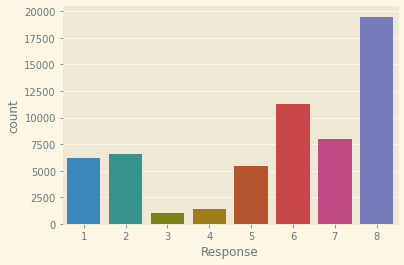

In [51]:
train_df['Response'].value_counts()
sns.countplot(x=train_df['Response']);

We can seen that Response 8 has the highest count while Response 3 has the least count 

In [52]:
train_df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


Checking for NULL values in columns

In [53]:
null_cols=train_df.columns[train_df.isna().any()]
train_df[null_cols].isna().sum()

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

We can see that the above columns have Null values

We need to remove the null values from the train datasets. For this we are checking for null value percentage in the columns and selecting the columns which have null value percent greater than 30% for analysis

In [54]:
#Columns with Null Values greater than 30 %
null_values = train_df.isnull().sum()/len(train_df)
print(null_values[null_values > 0.30].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
Family_Hist_4          0.323066
dtype: float64


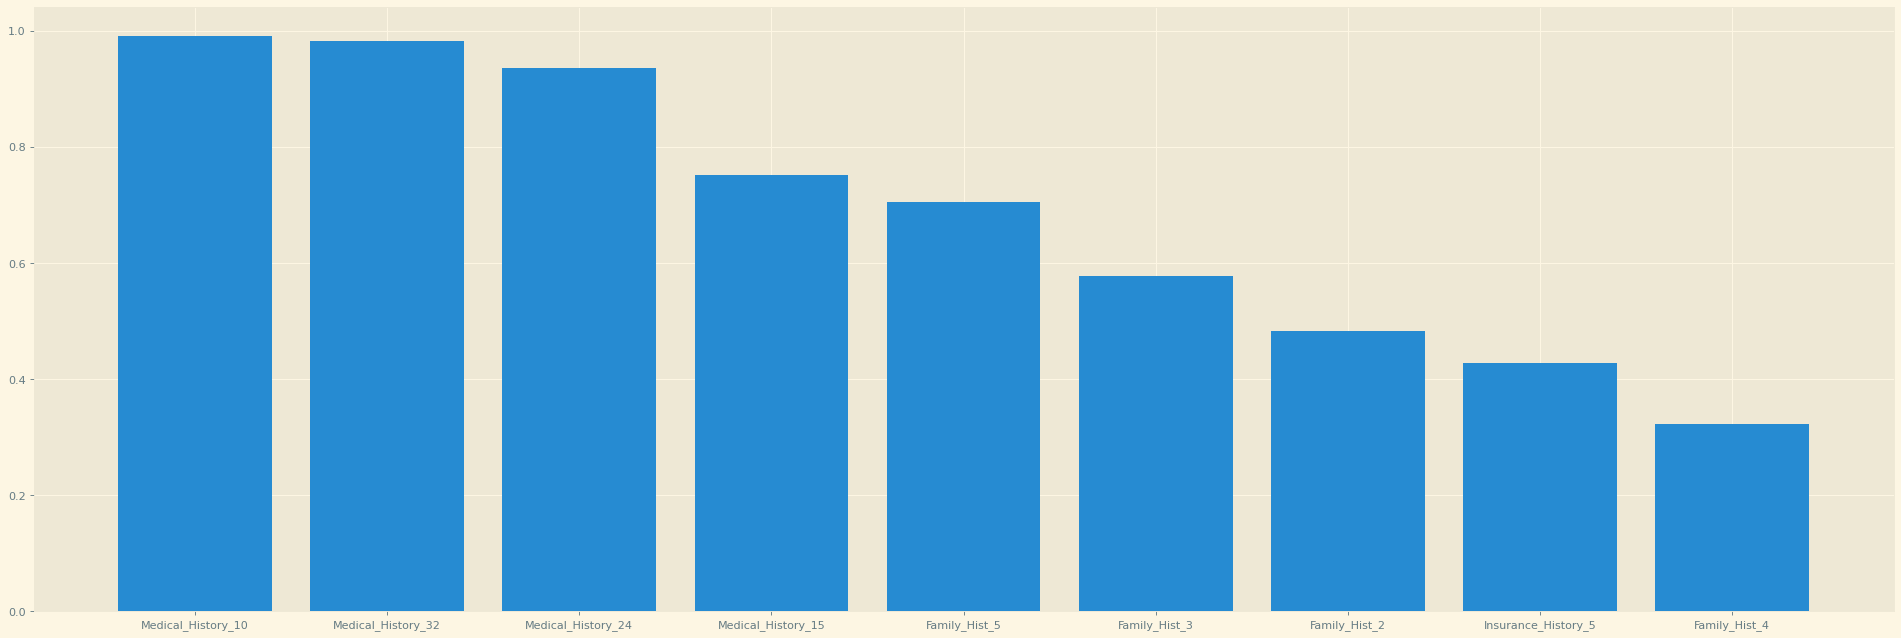

In [55]:
from matplotlib.pyplot import figure
figure(figsize=(30, 10), dpi=80) 
bar1 = plt.bar(['Medical_History_10','Medical_History_32','Medical_History_24','Medical_History_15','Family_Hist_5',"Family_Hist_3",'Family_Hist_2','Insurance_History_5','Family_Hist_4'],
         [0.990620,0.981358,0.935990,0.751015,0.704114,0.576632,0.482579,0.427679,0.323066])


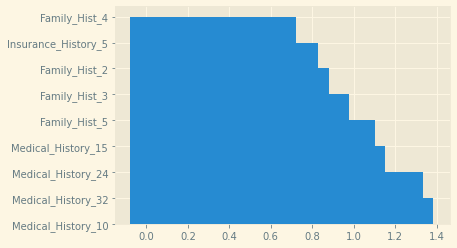

In [56]:
bar1 = plt.bar([0.990620,0.981358,0.935990,0.751015,0.704114,0.576632,0.482579,0.427679,0.323066],
         ['Medical_History_10','Medical_History_32','Medical_History_24','Medical_History_15','Family_Hist_5',"Family_Hist_3",'Family_Hist_2','Insurance_History_5','Family_Hist_4'])

In [57]:
attributes =  [col for col in train_df.columns if train_df[col].dtype =='object']

numerical = attributes = [col for col in train_df.columns if train_df[col].dtype !='object']

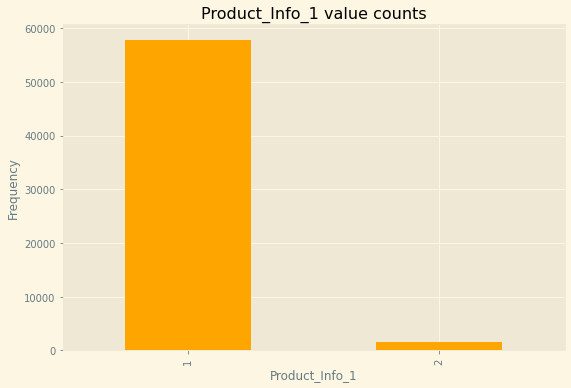

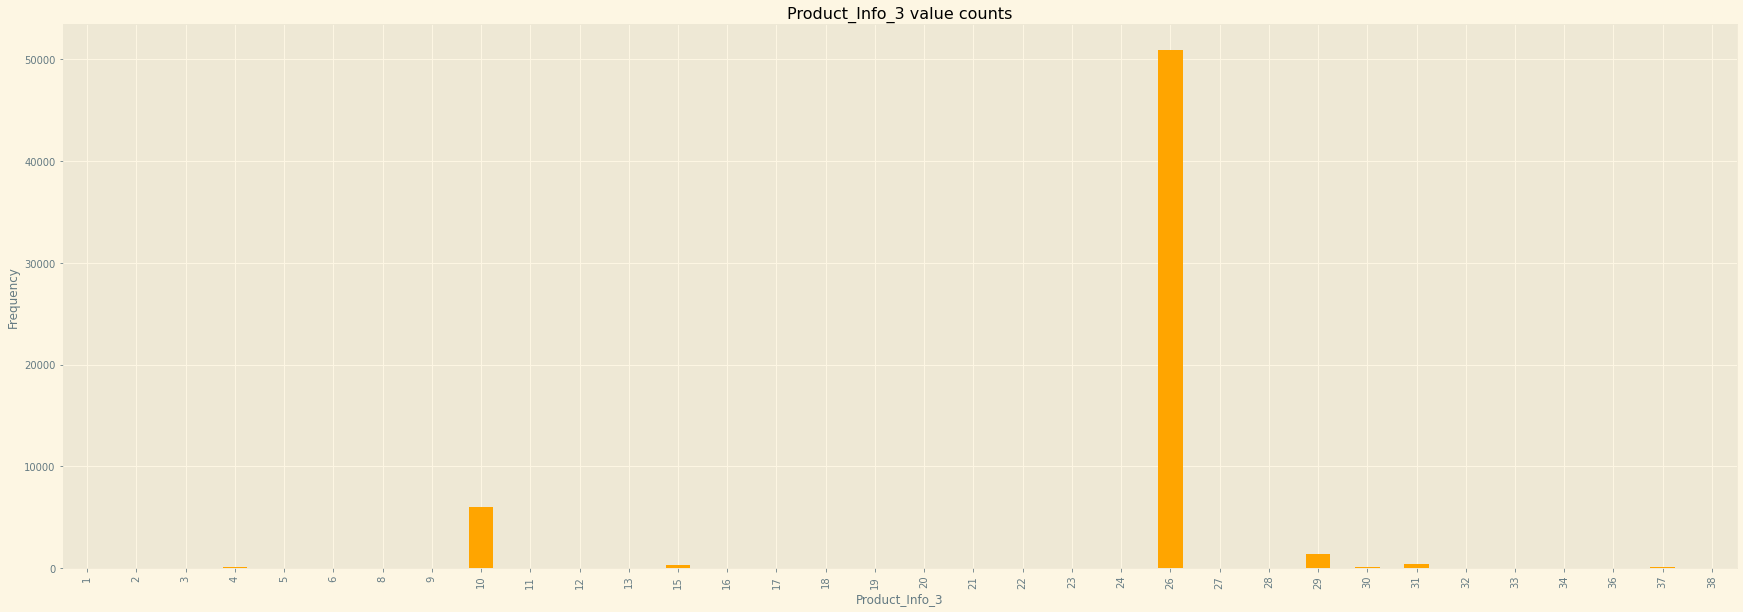

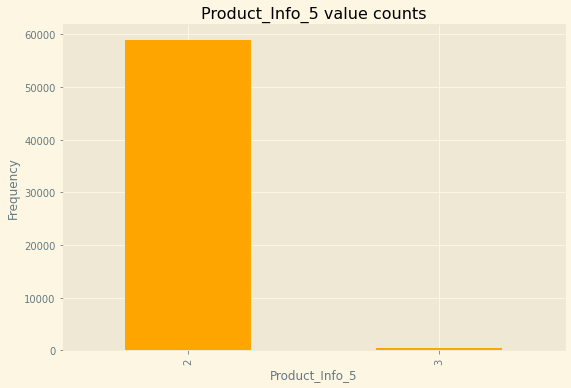

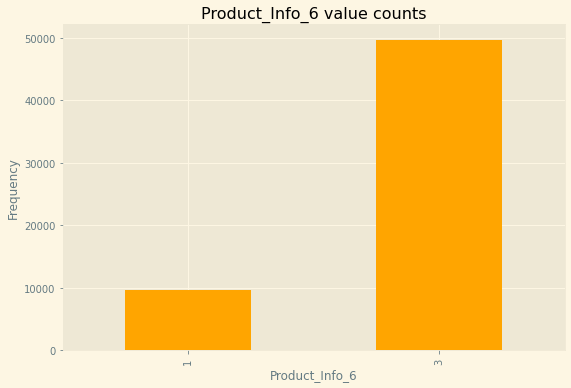

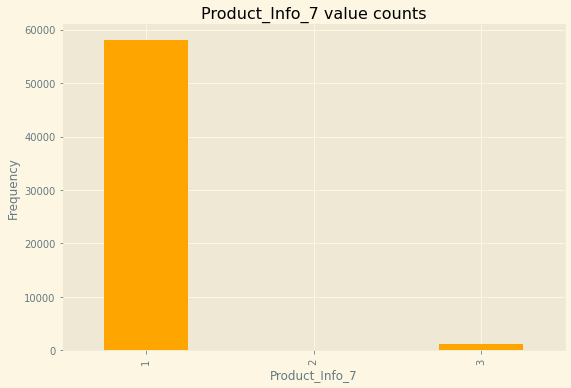

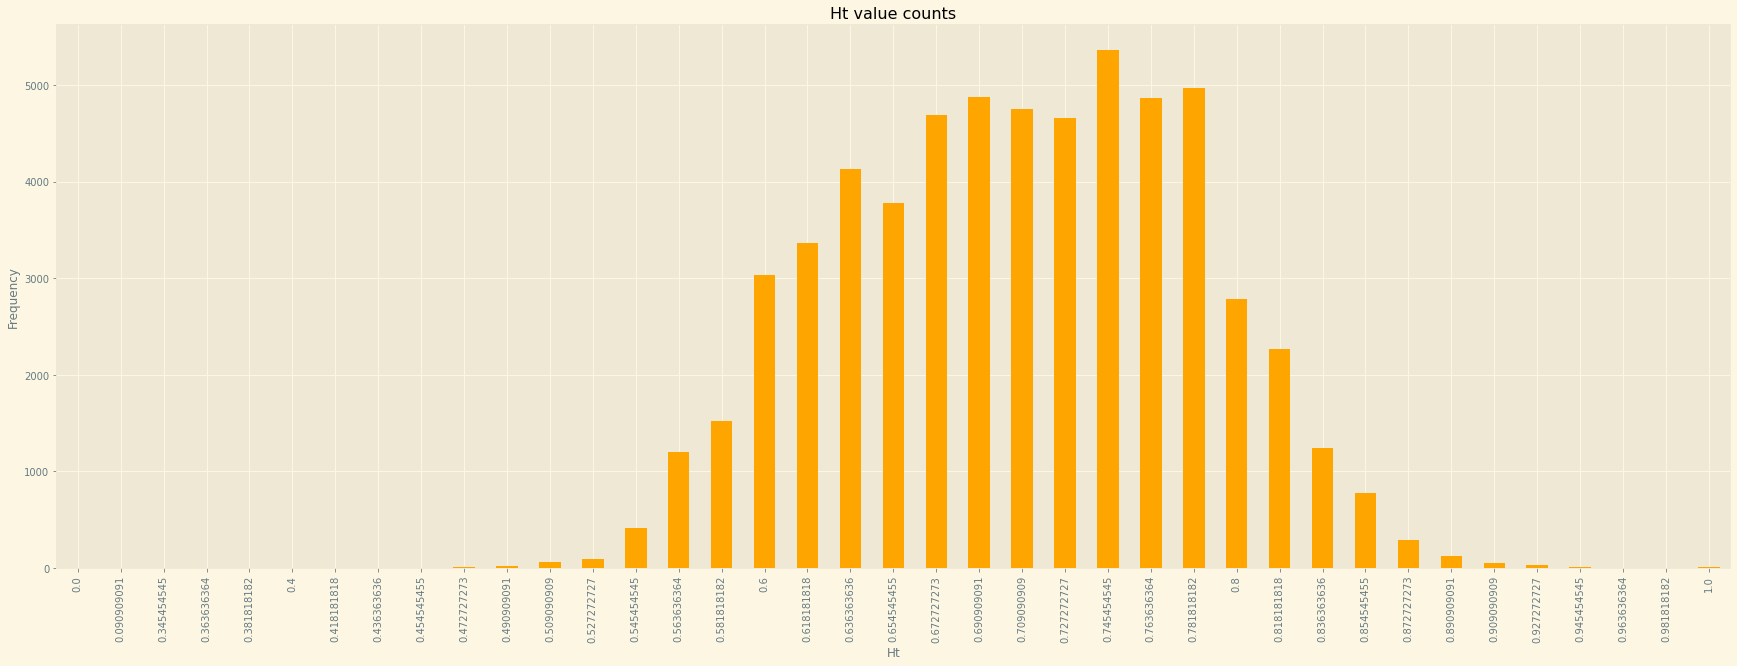

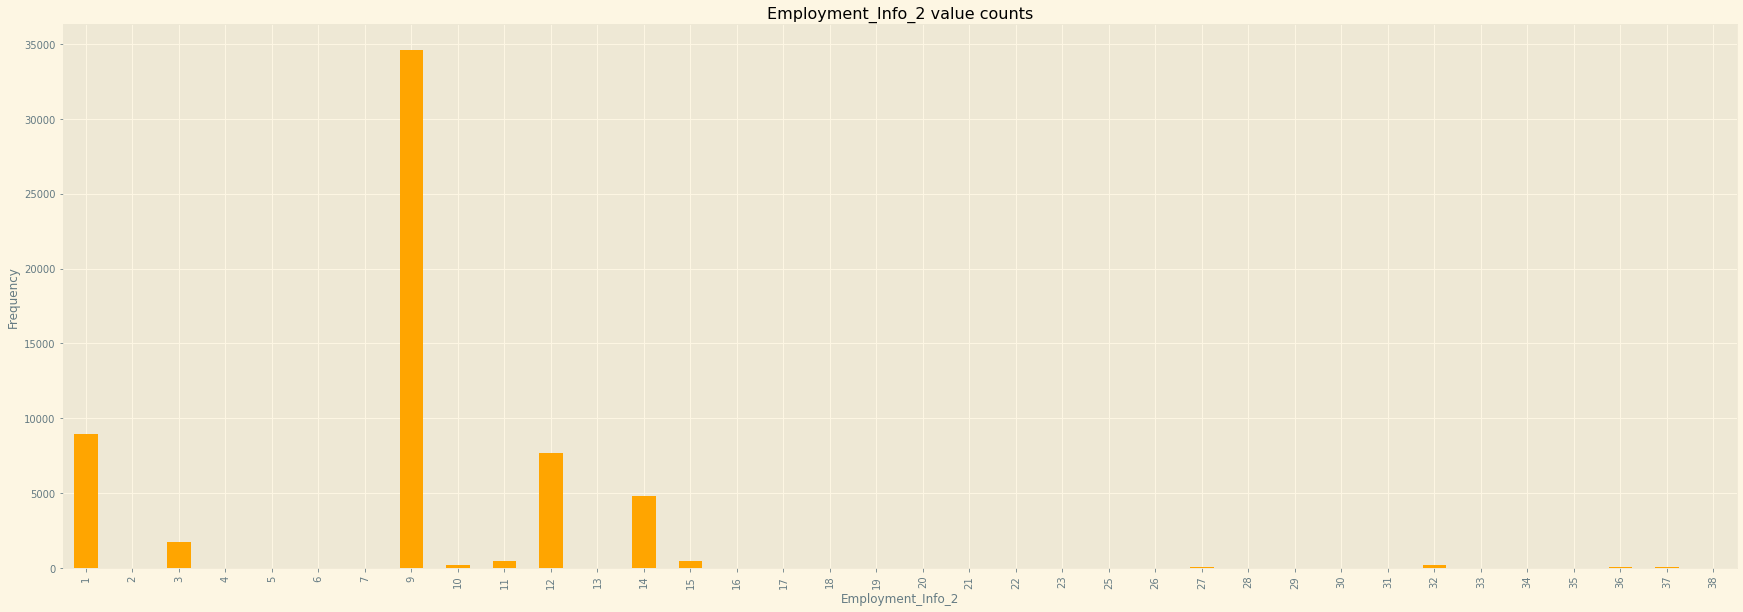

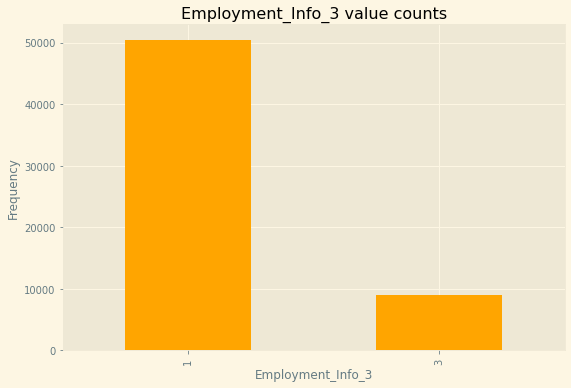

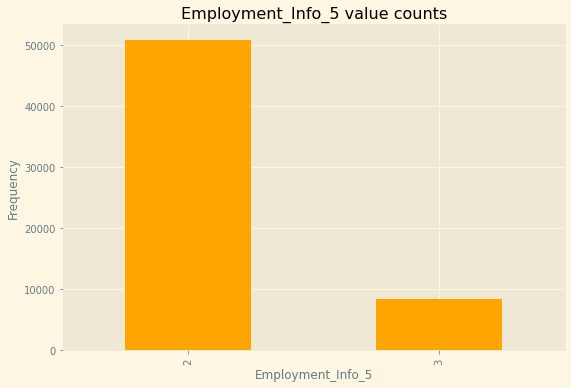

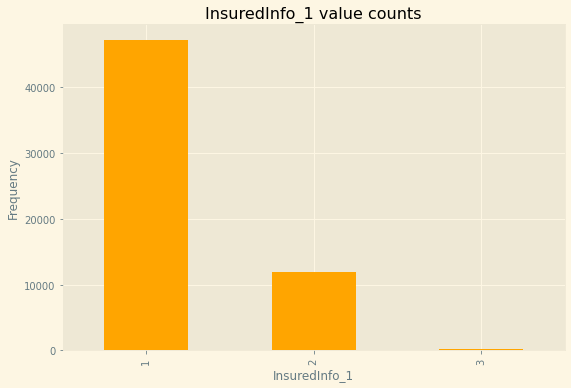

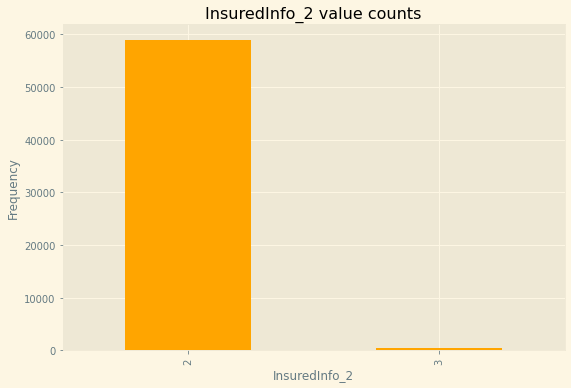

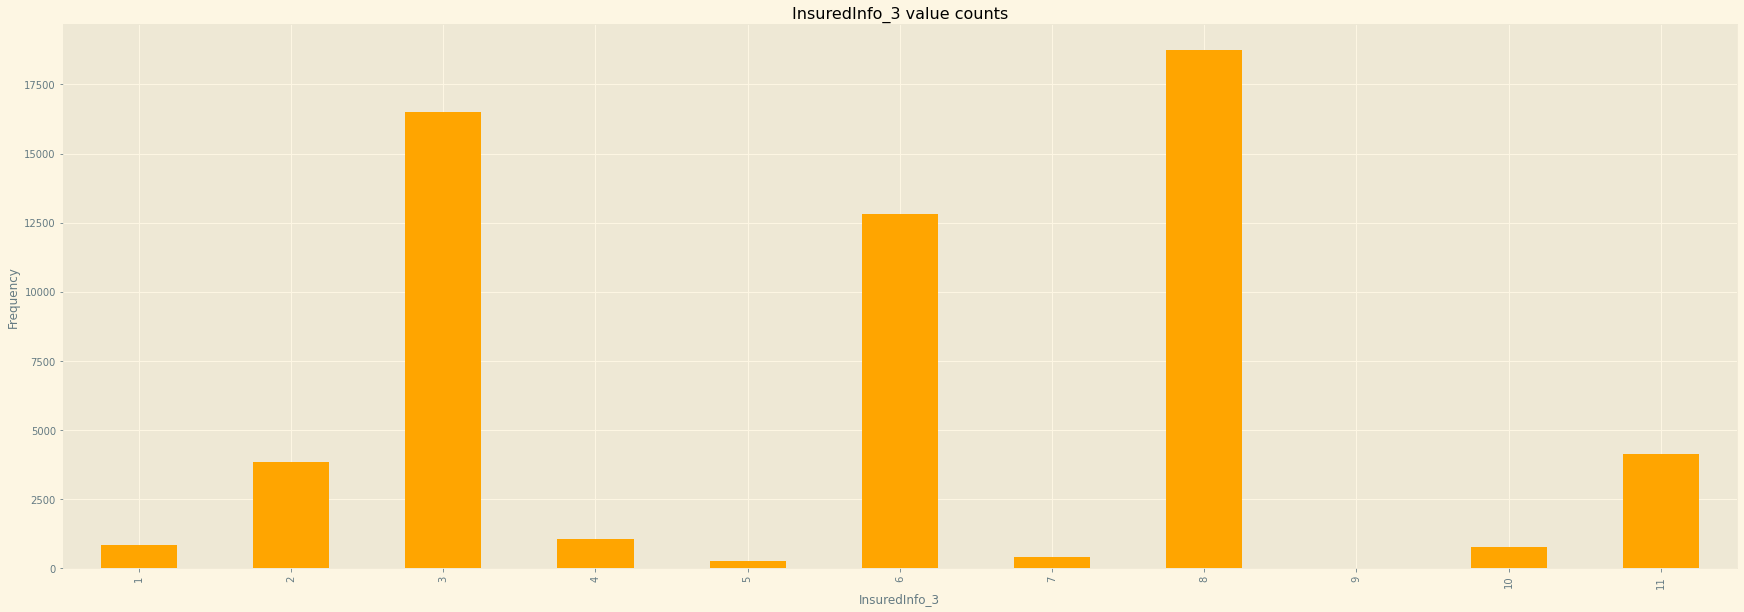

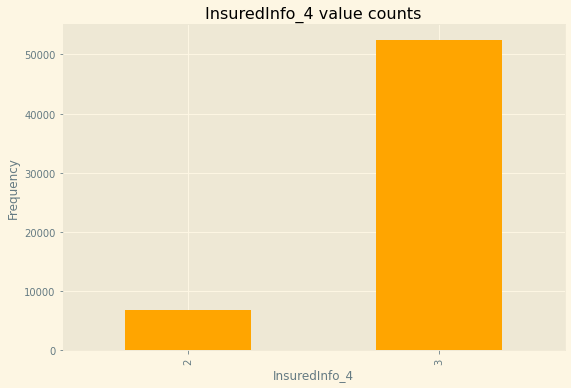

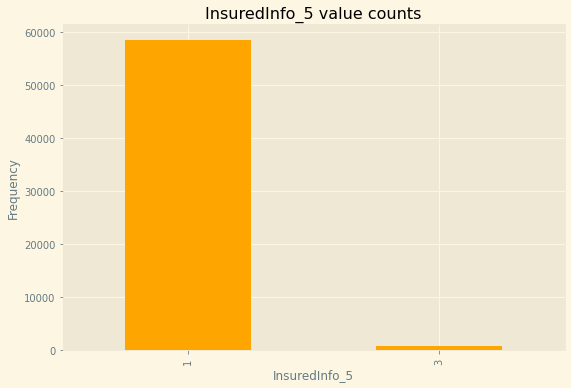

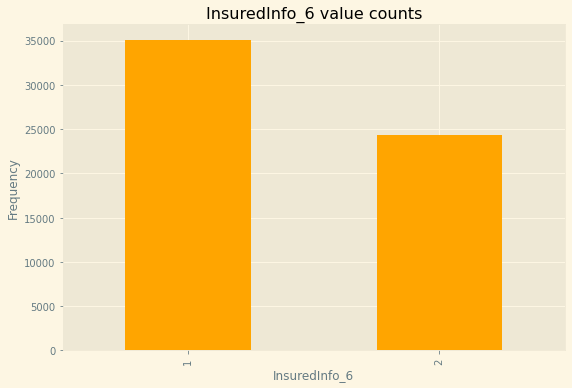

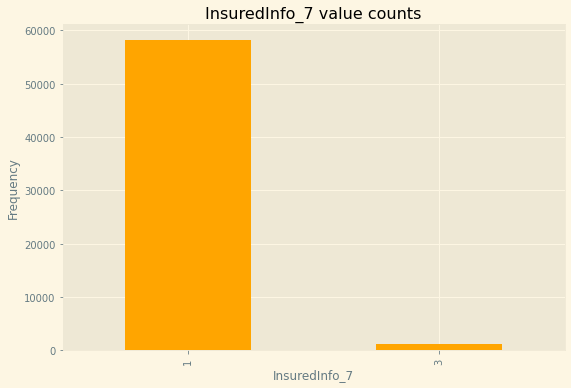

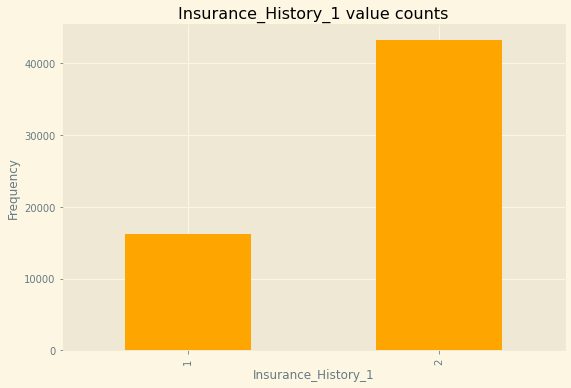

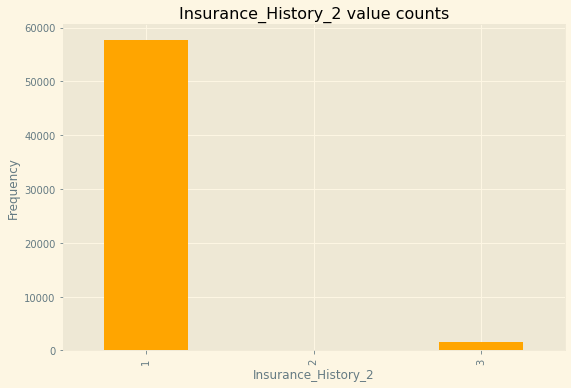

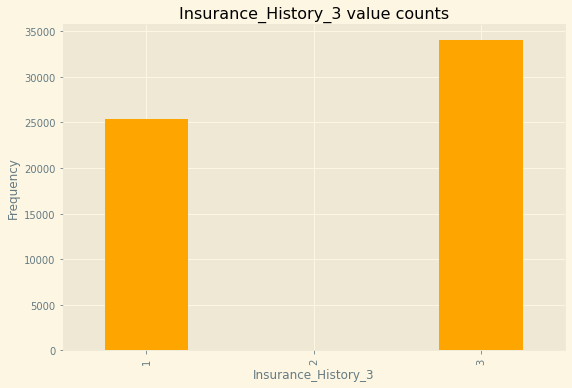

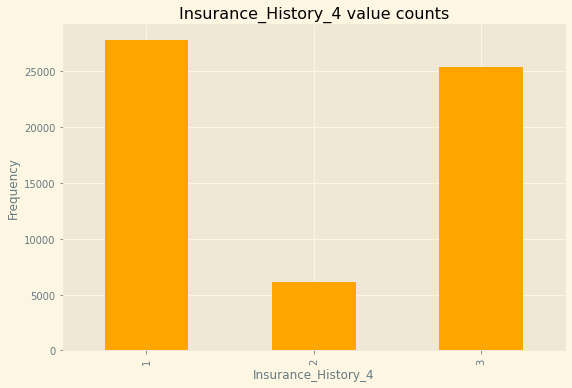

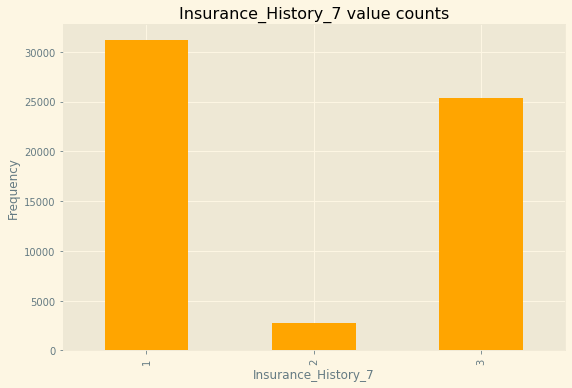

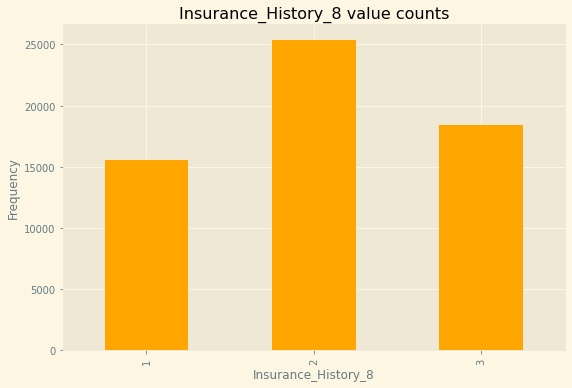

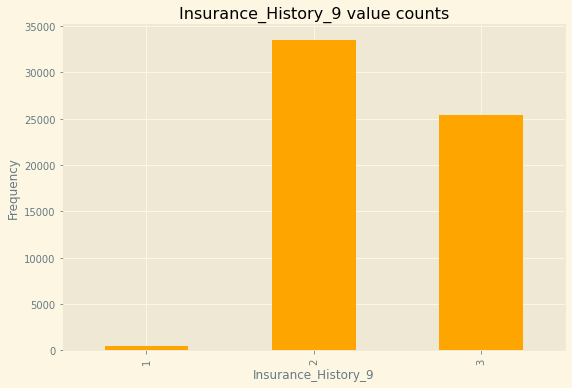

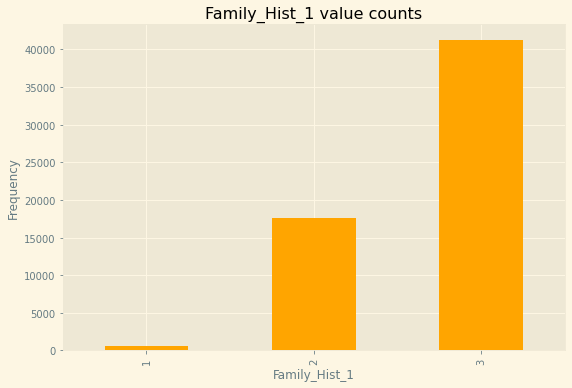

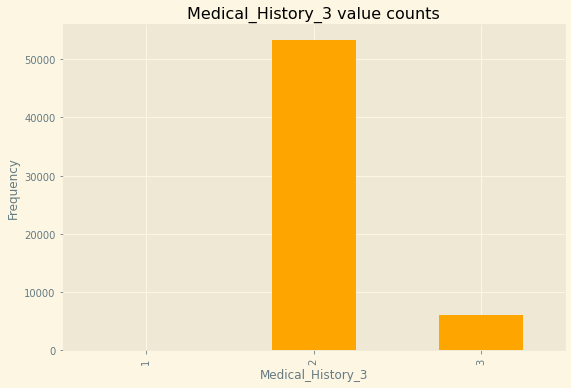

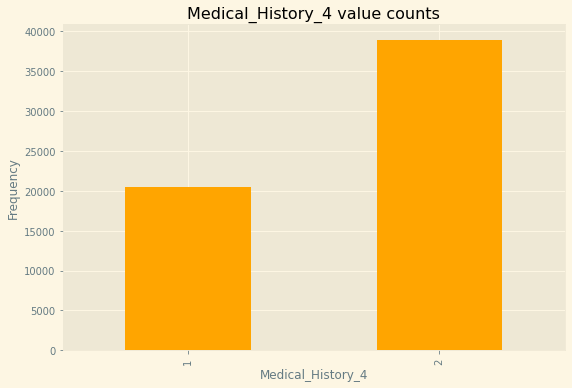

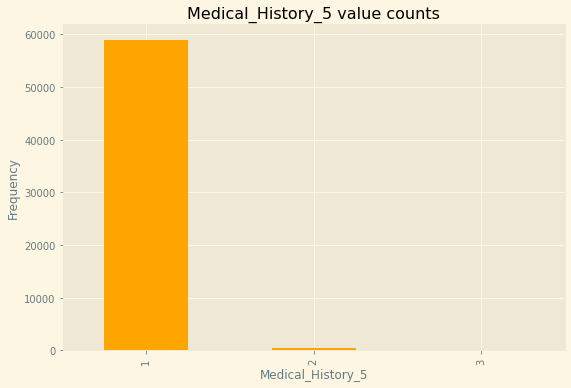

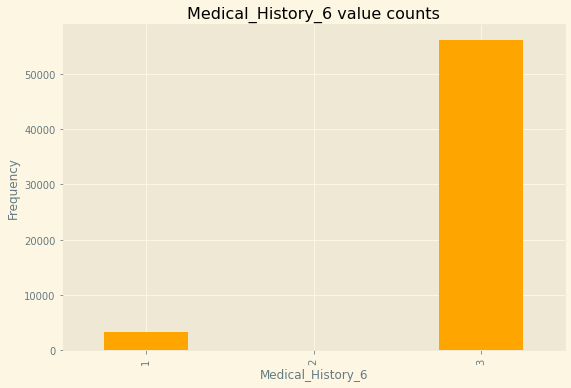

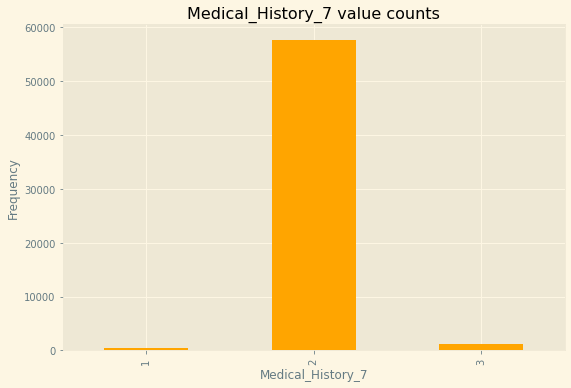

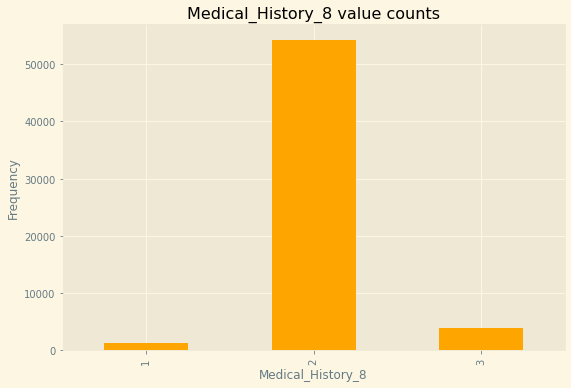

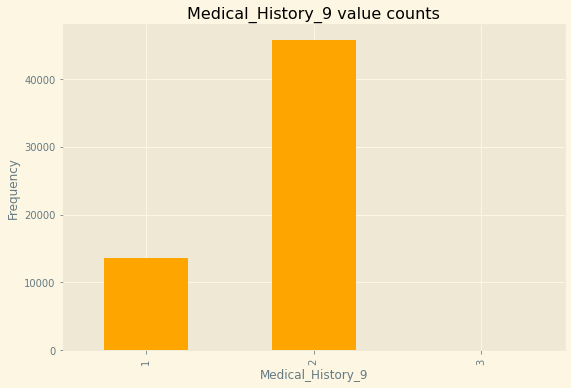

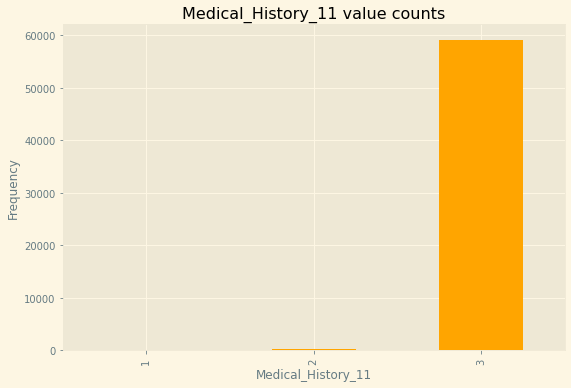

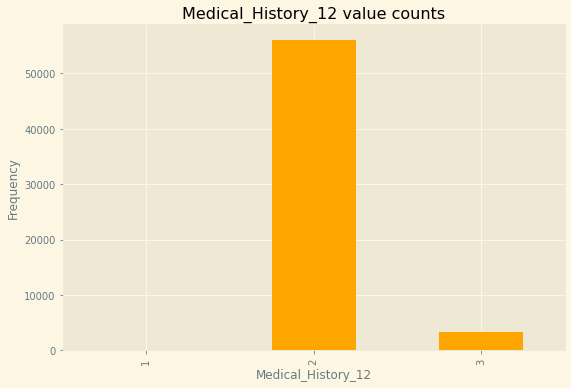

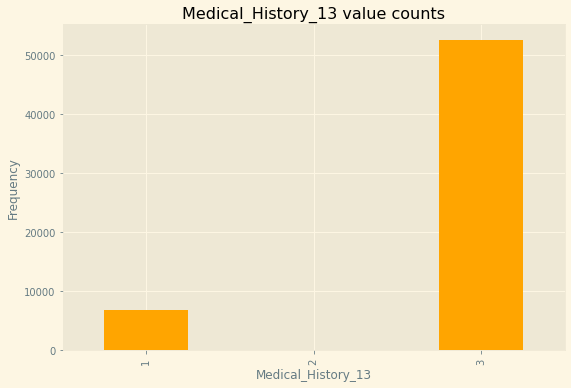

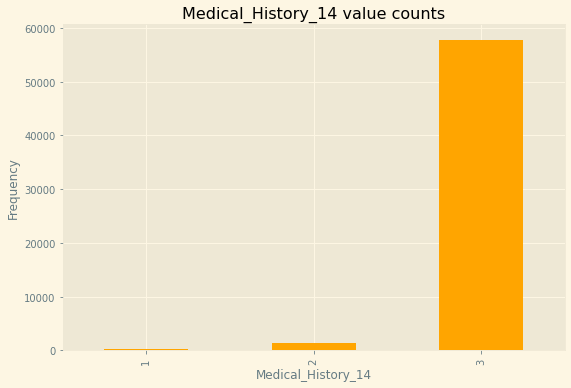

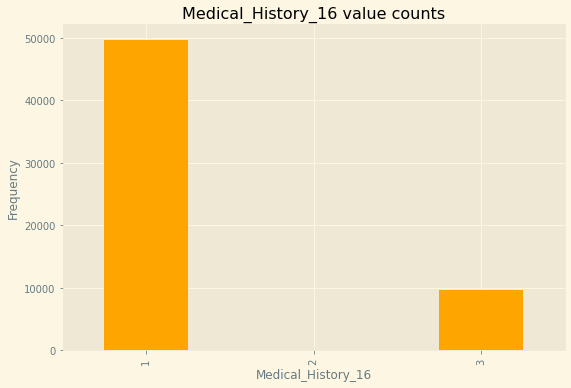

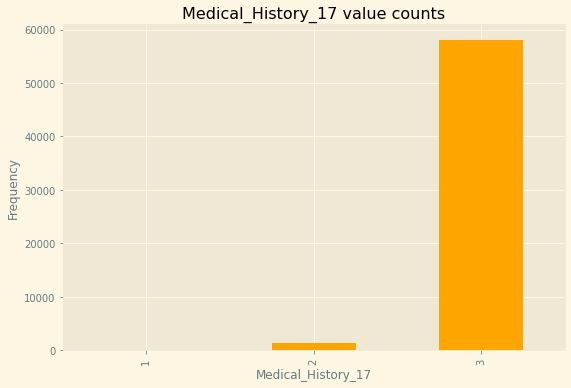

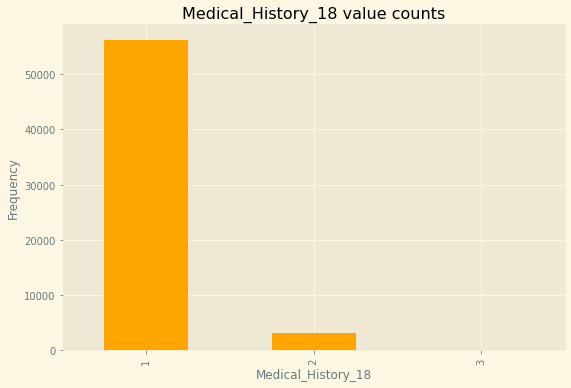

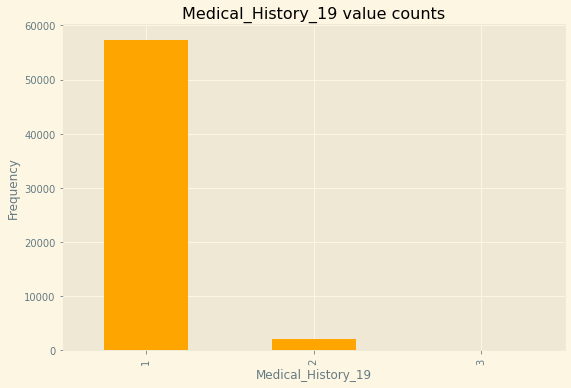

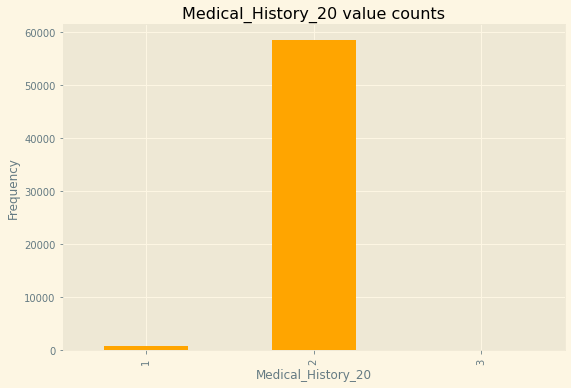

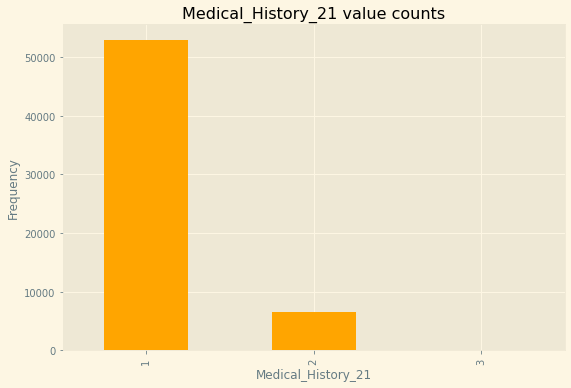

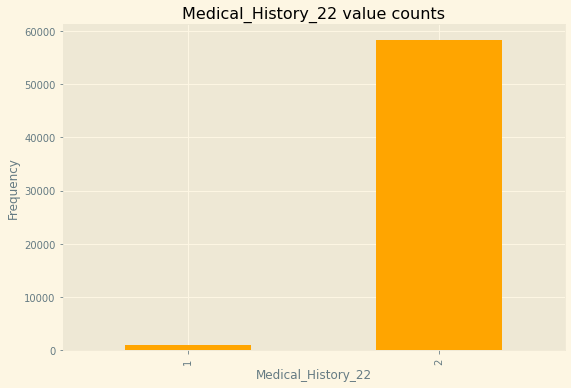

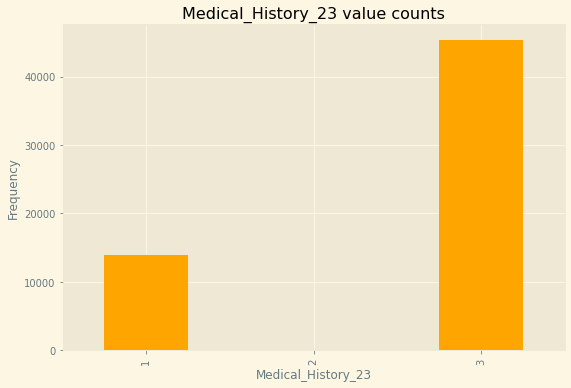

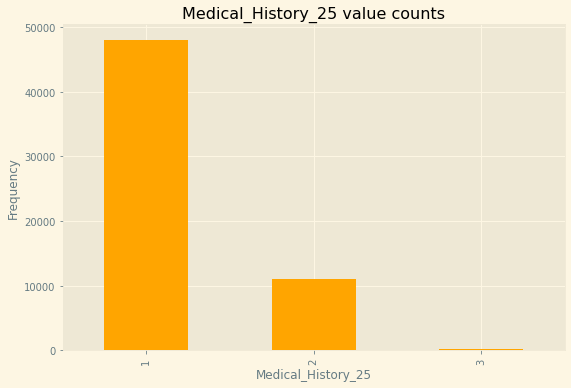

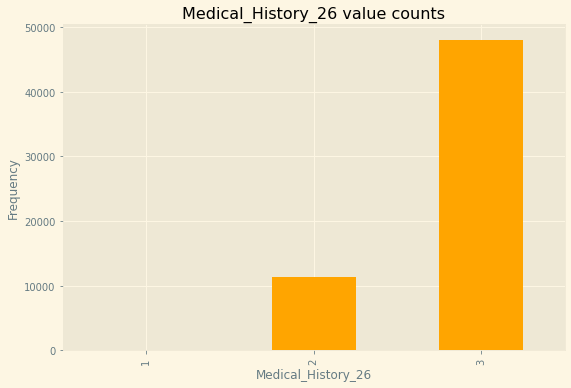

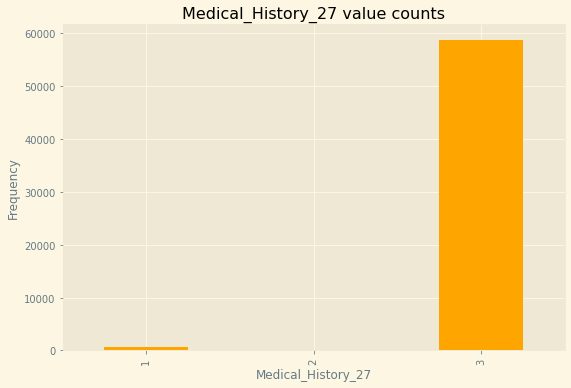

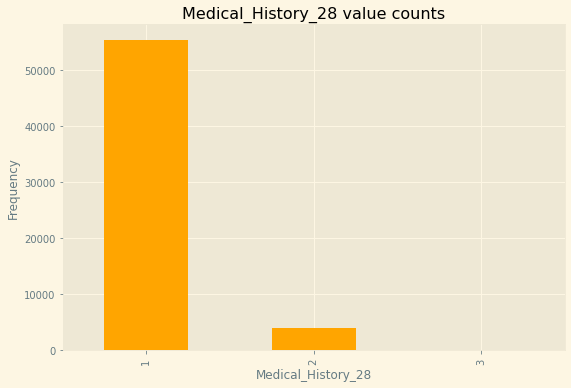

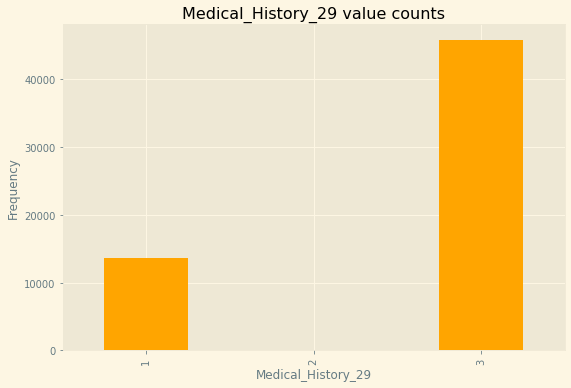

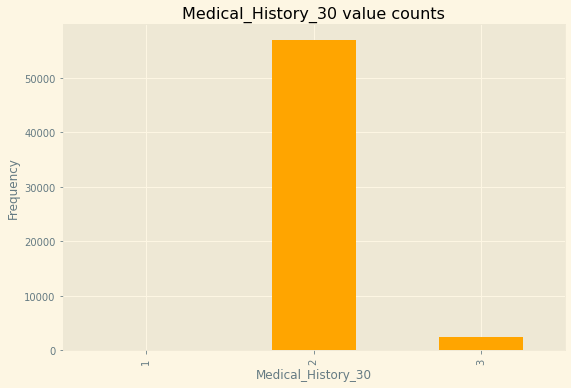

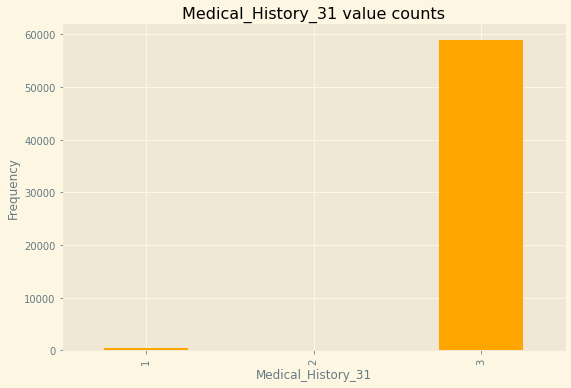

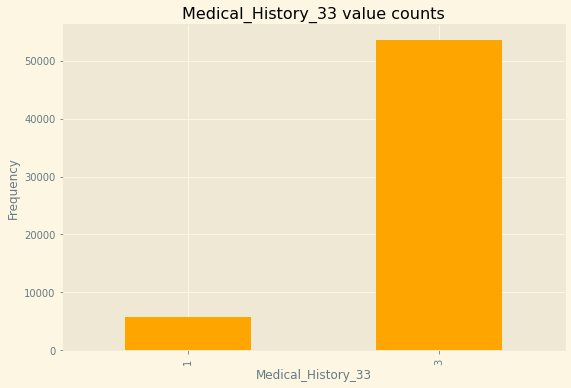

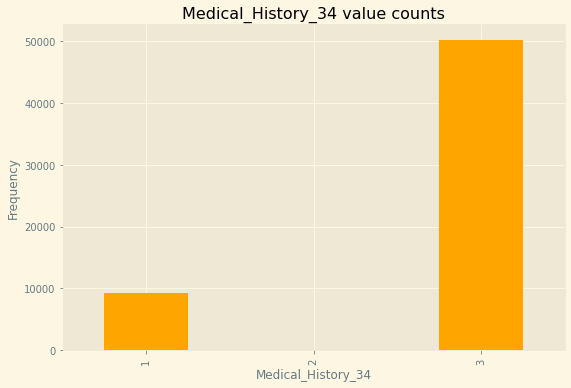

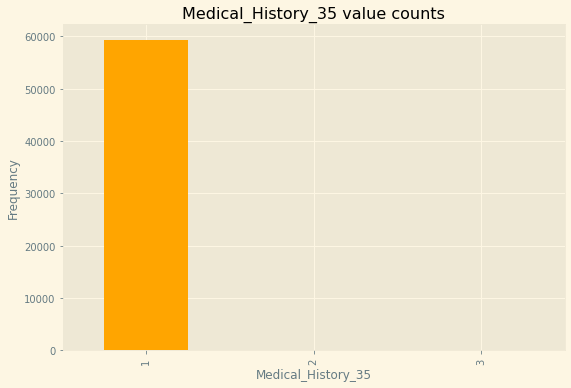

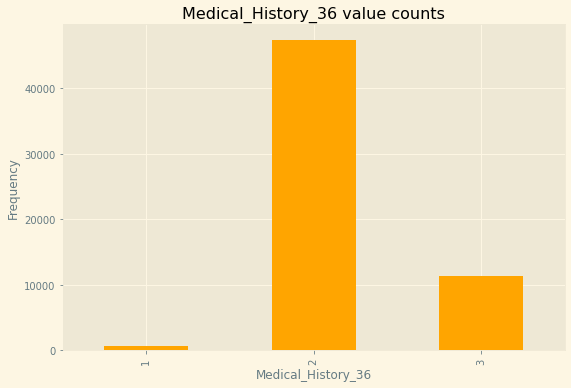

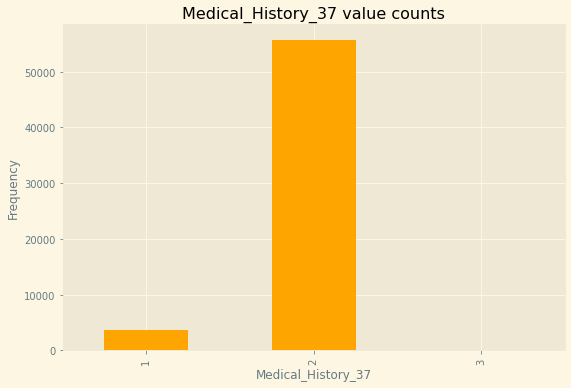

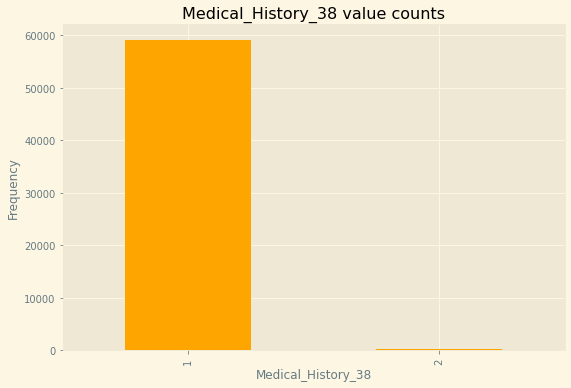

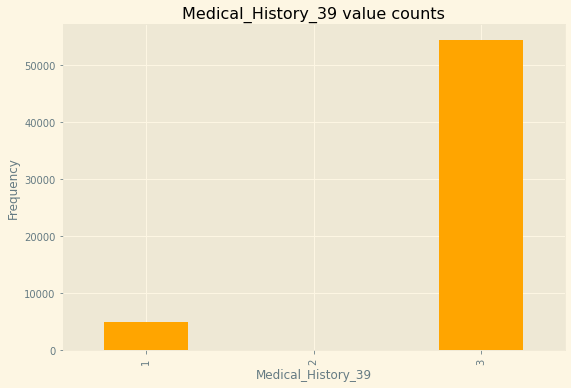

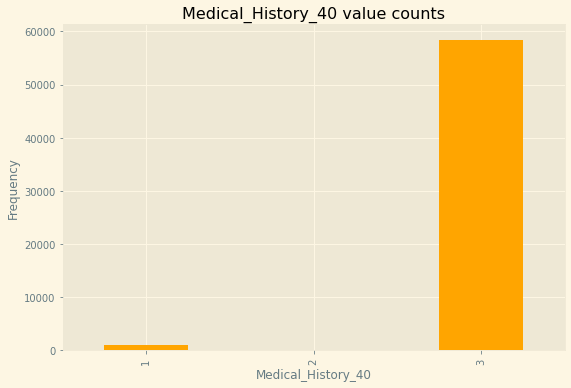

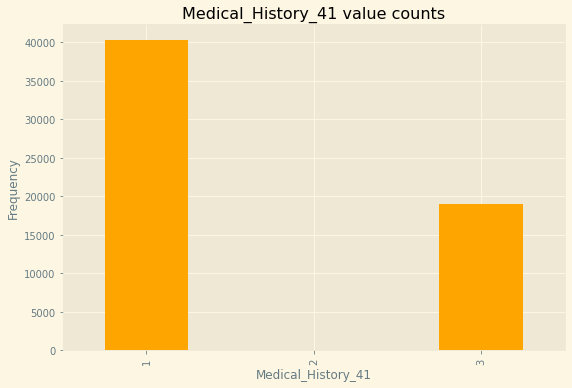

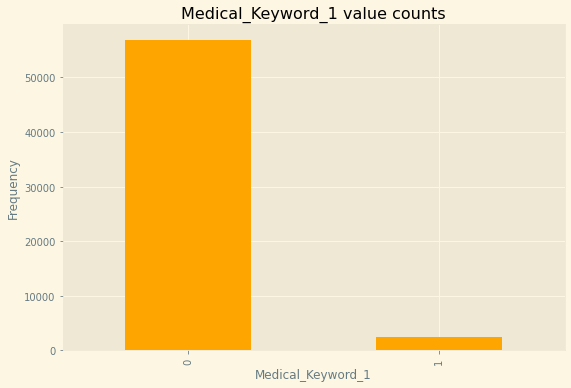

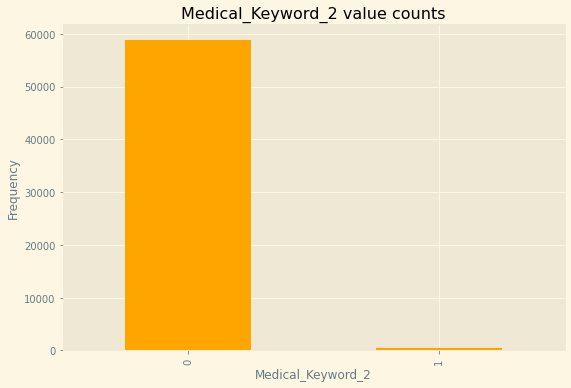

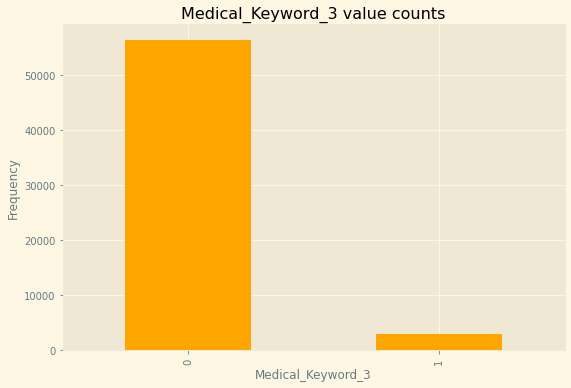

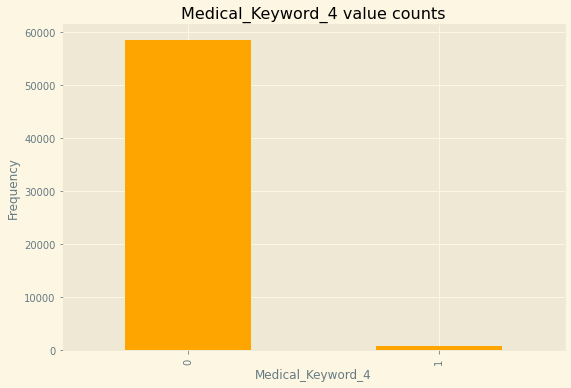

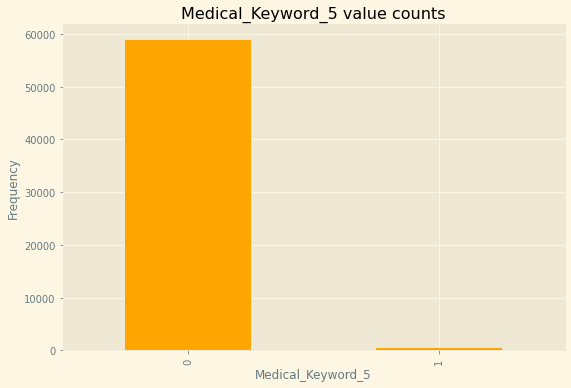

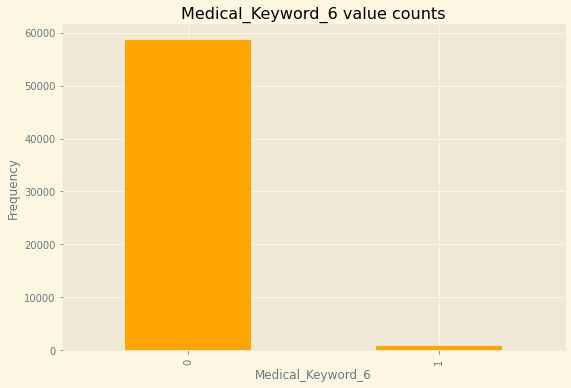

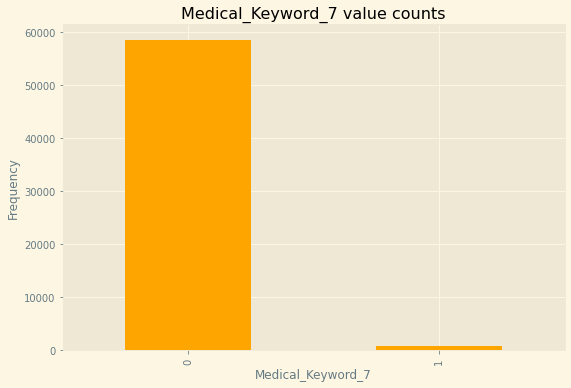

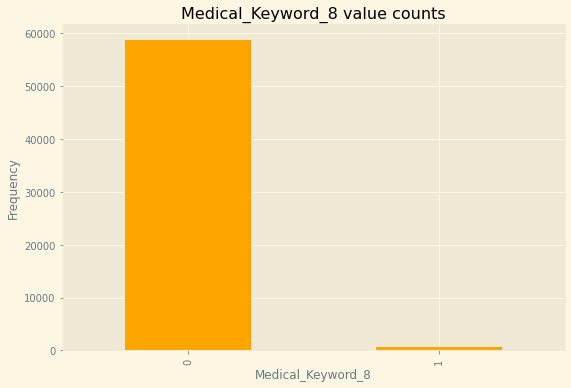

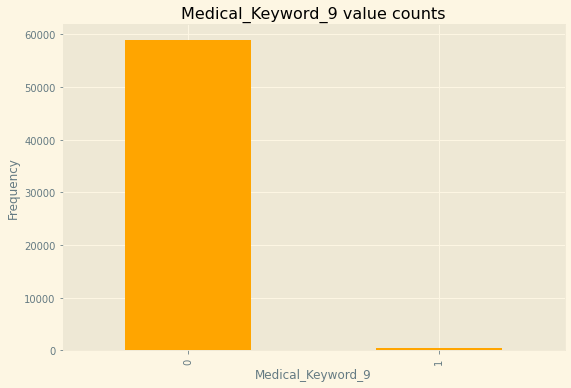

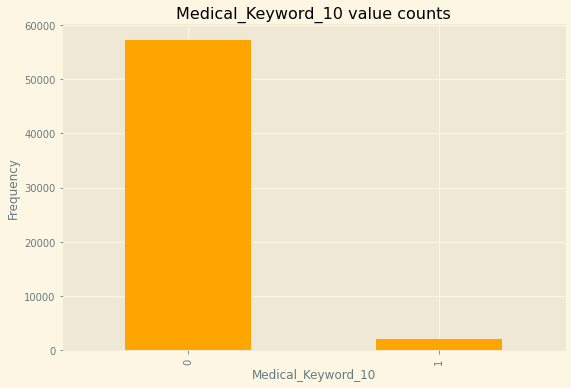

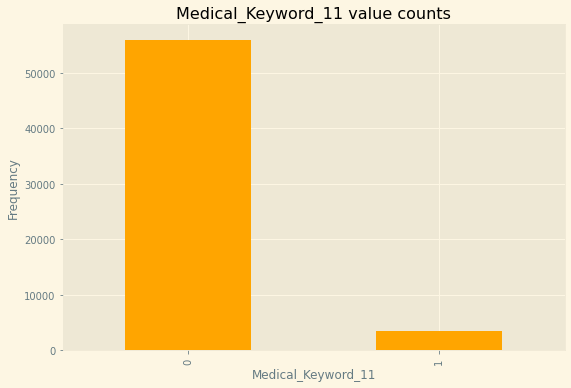

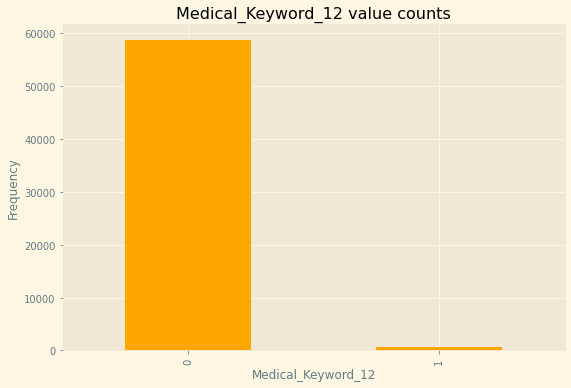

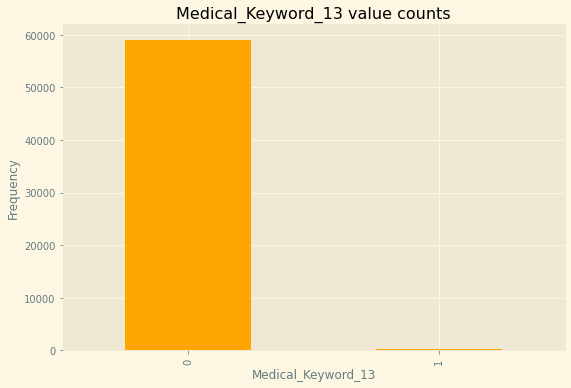

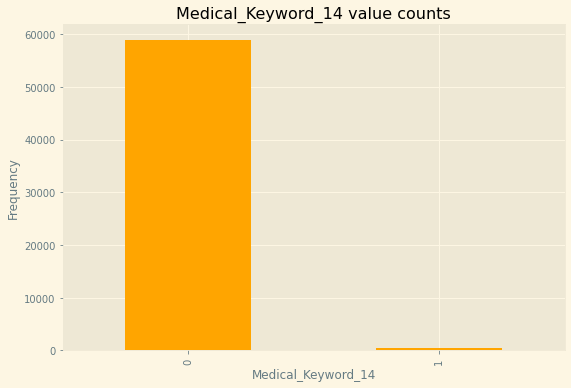

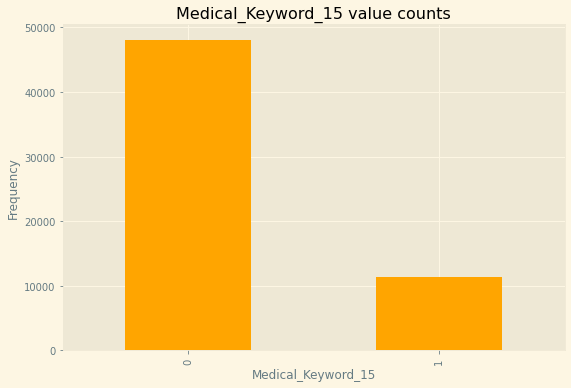

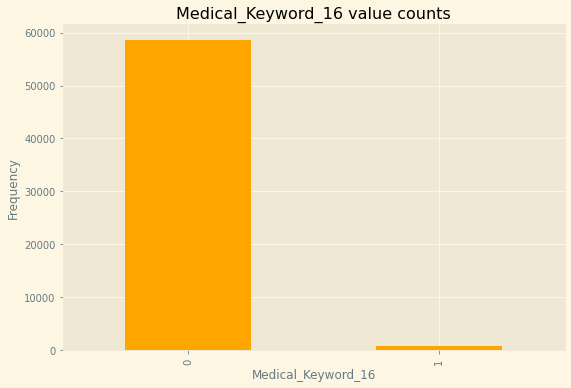

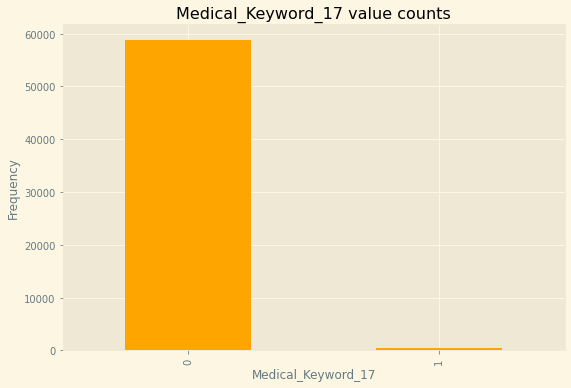

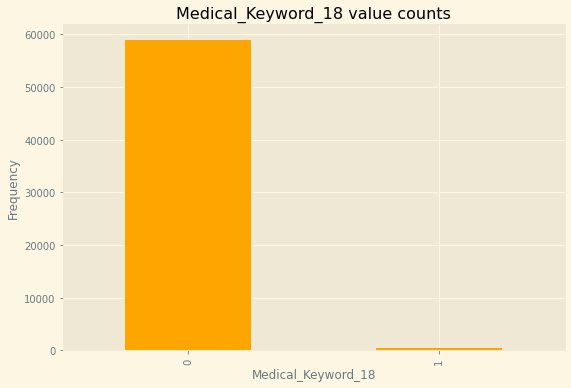

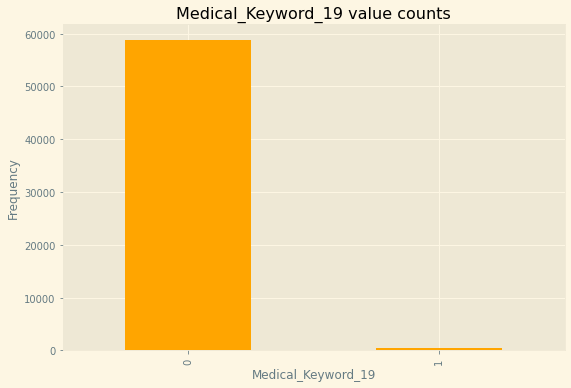

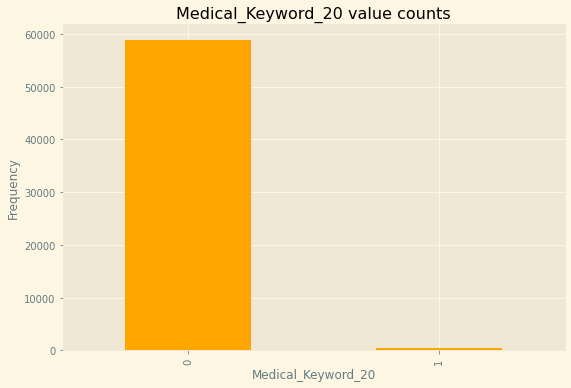

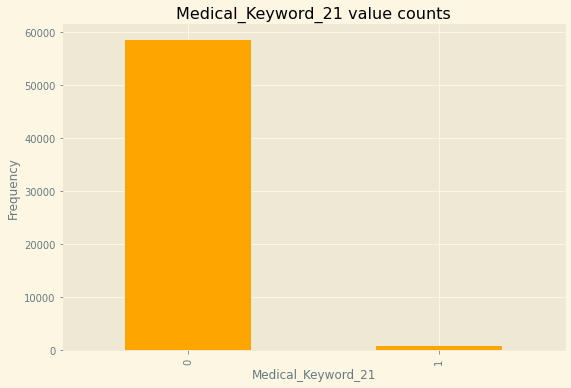

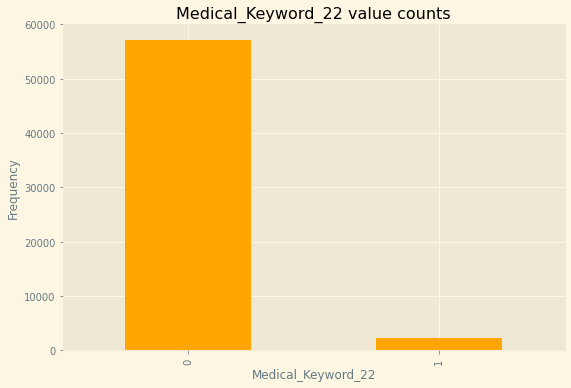

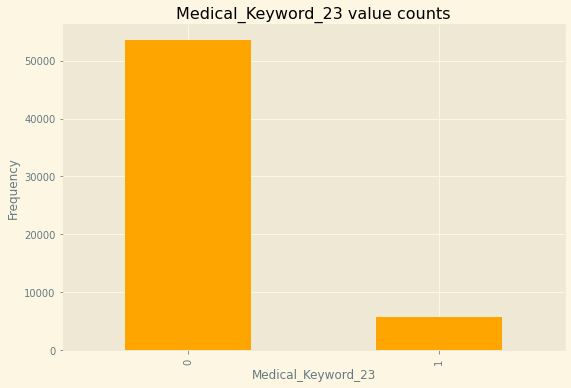

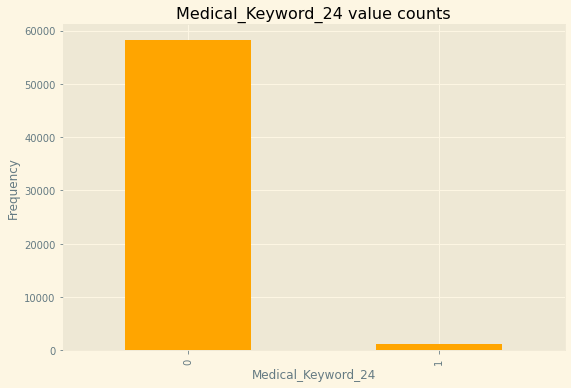

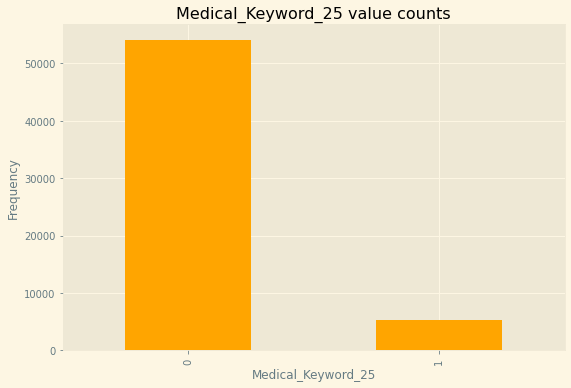

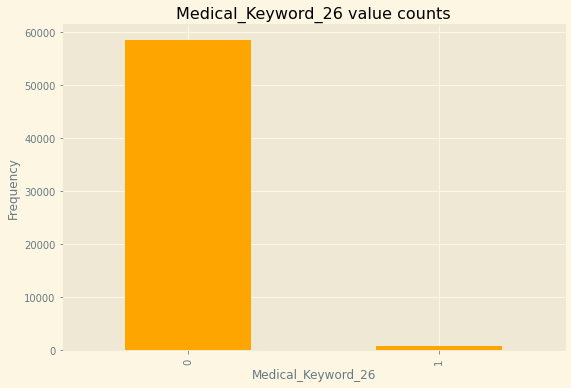

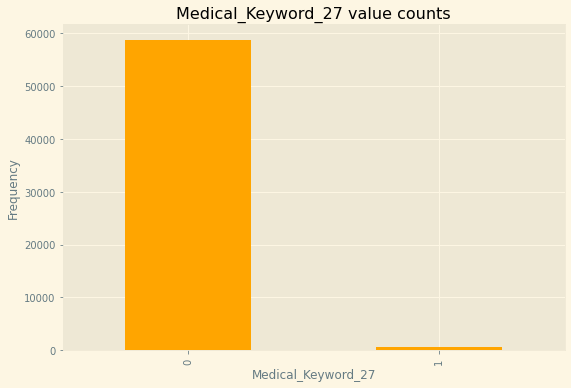

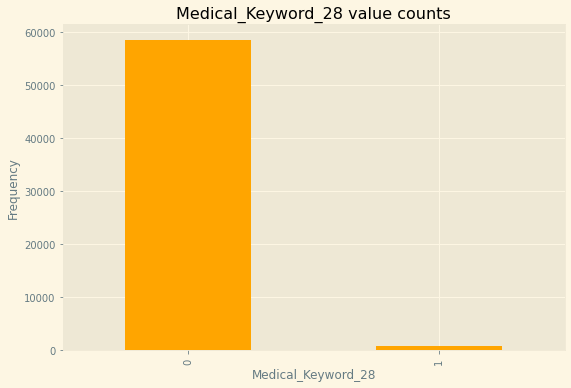

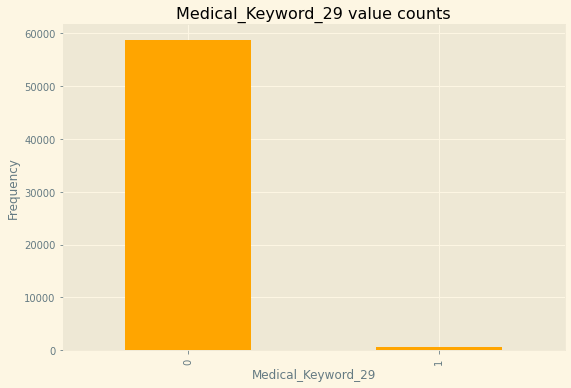

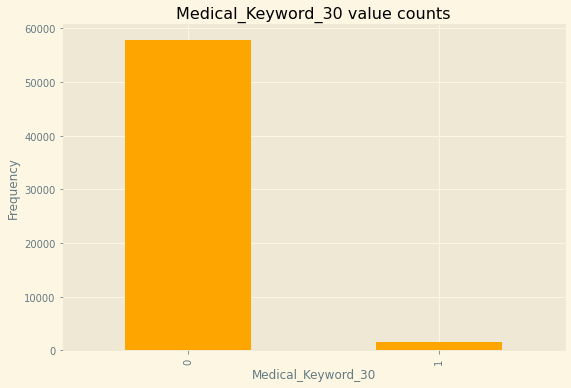

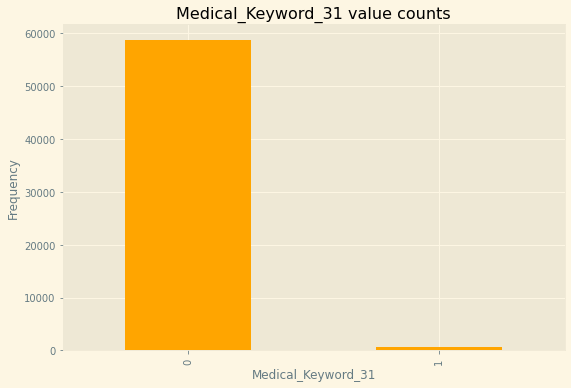

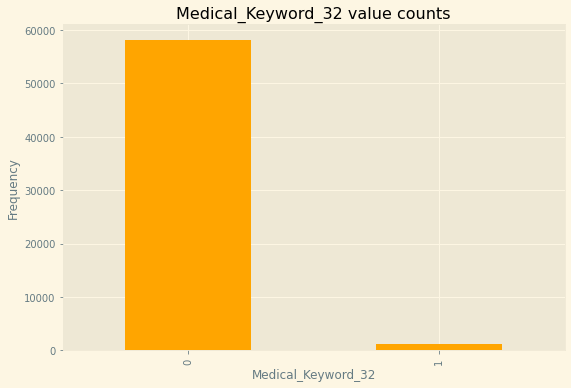

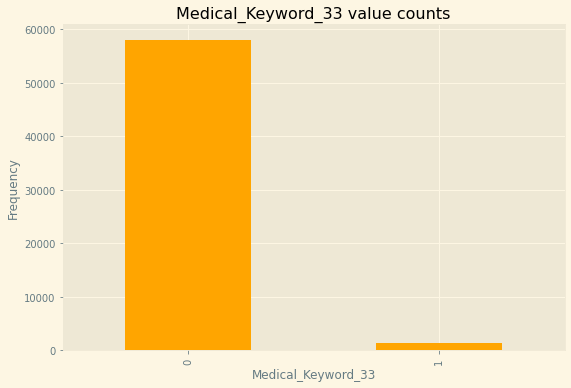

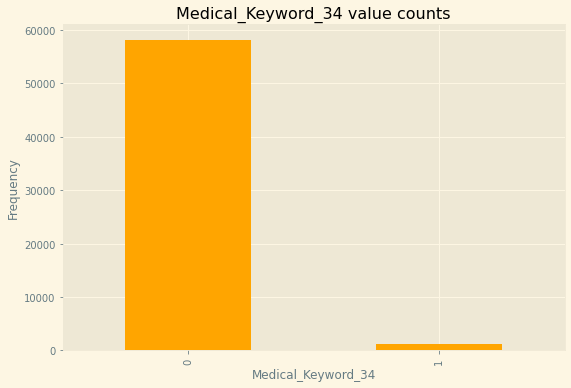

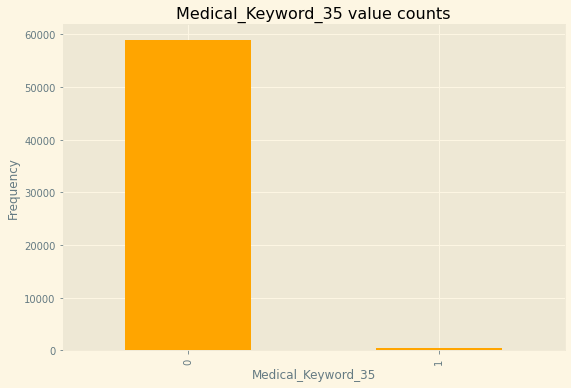

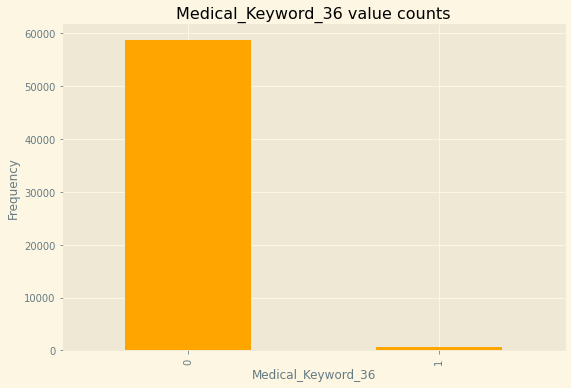

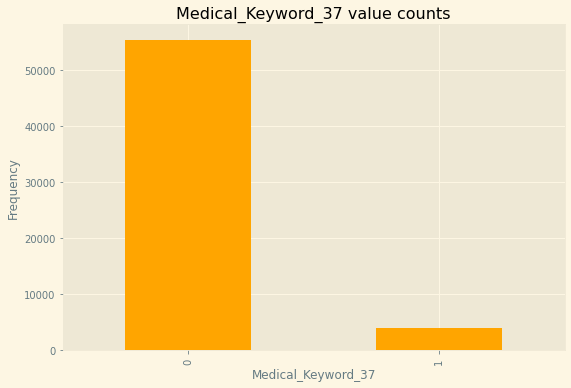

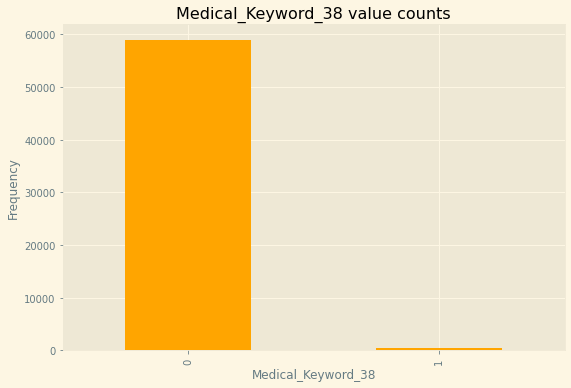

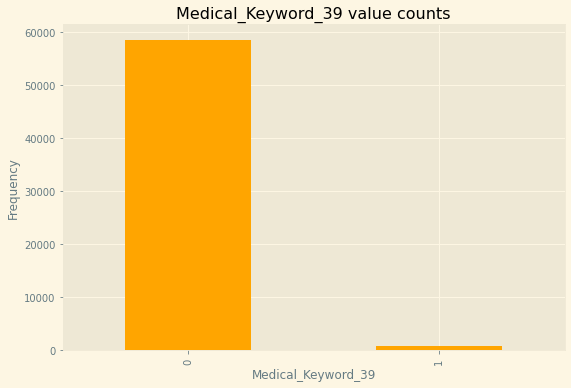

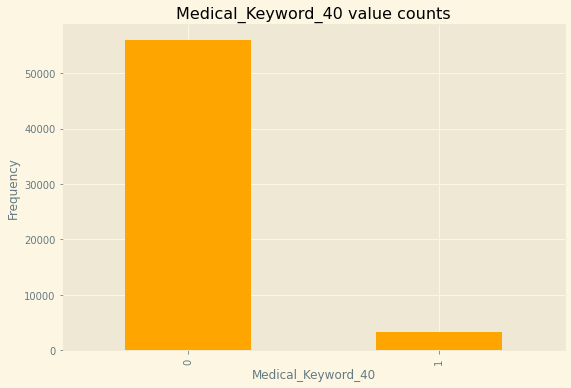

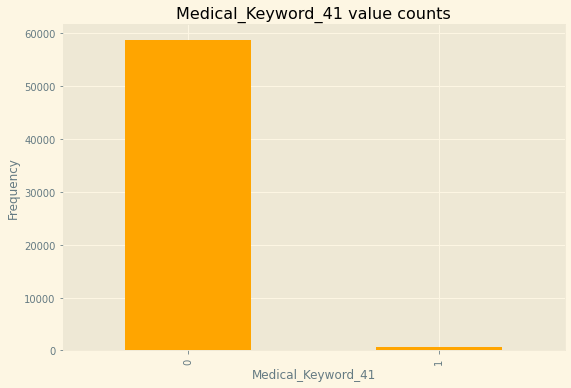

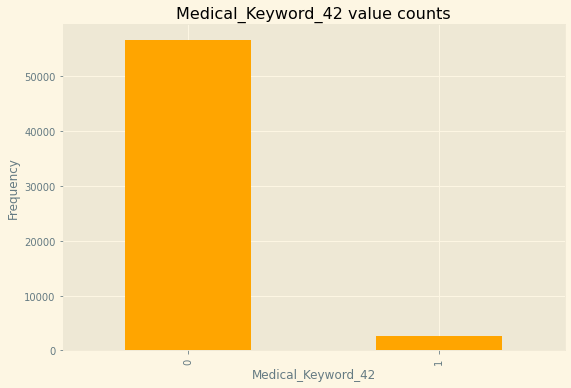

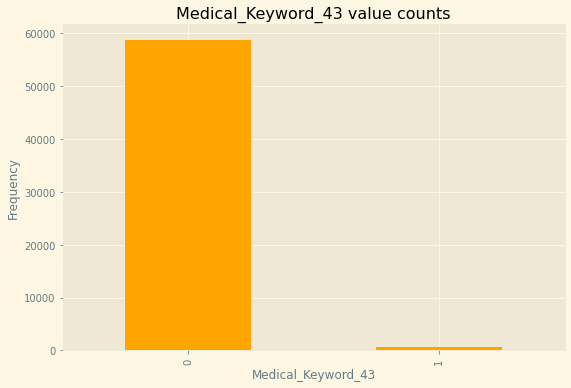

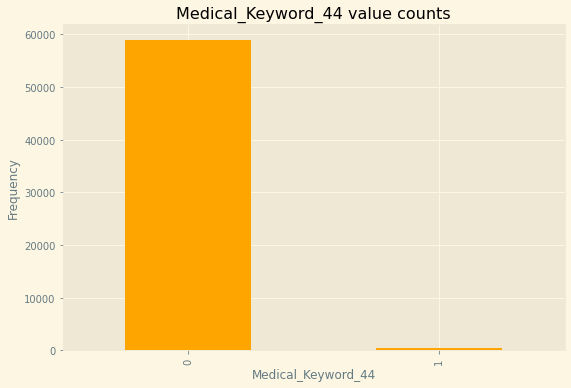

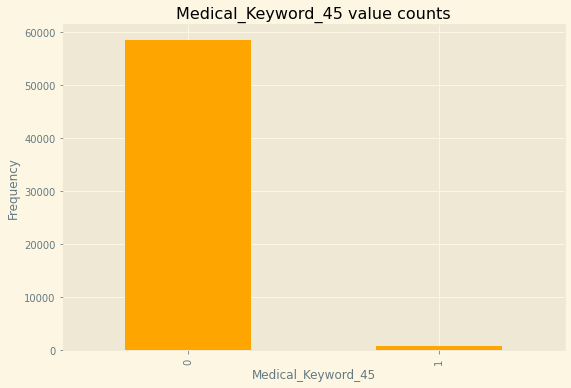

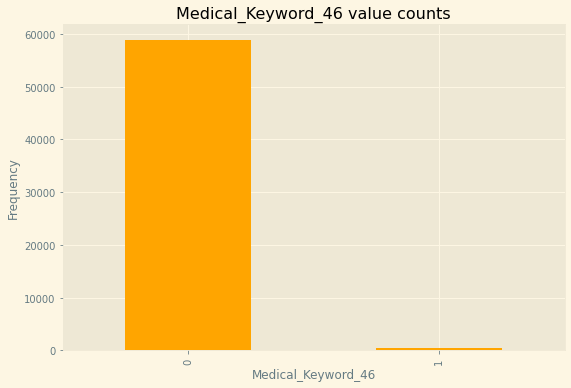

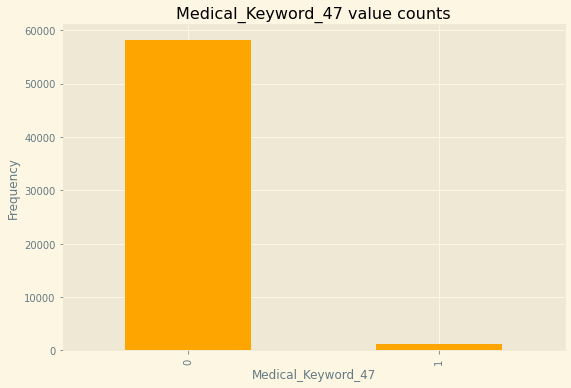

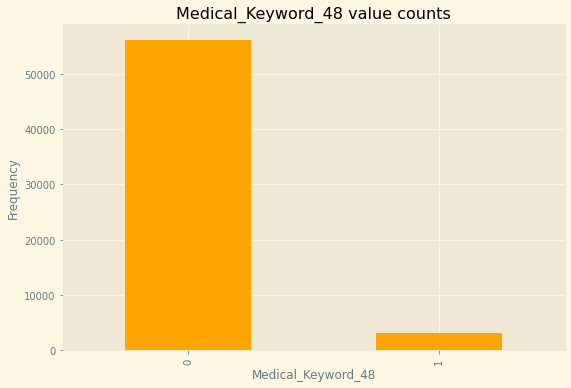

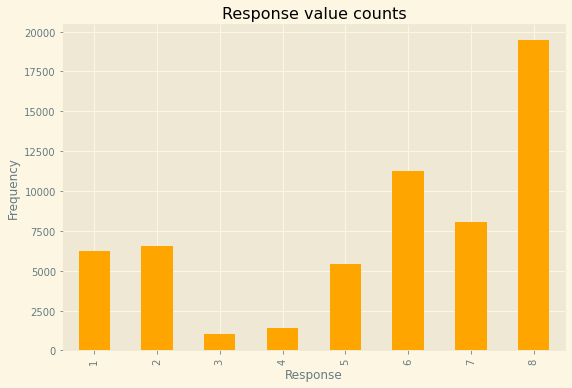

In [58]:
for col in attributes:
    counts = train_df[col].value_counts().sort_index()
    if len(counts) > 10 and len(counts) < 50 :
      fig = plt.figure(figsize = (30, 10))
    elif len(counts) > 50 :
      continue
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='orange')
    ax.set_title(col + ' value counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

We will discard the Columns that have null value percentage more than 30%

In [59]:
cols_with_more_than_30_percent_null = ['Family_Hist_4', 'Insurance_History_5','Family_Hist_2', 'Family_Hist_3', 'Family_Hist_5', 'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']
train_df = train_df.drop(cols_with_more_than_30_percent_null, axis=1)

In addition to that, we will also discard the Product_Info_2 Column which is a categorical column.

In [60]:
train_df = train_df.drop(['Product_Info_2'], axis =1)
train_df.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,
2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,0,0,8
5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,0,0,4
6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,0,0,8
7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,0,0,8
8,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,0,0,0,8


Replacing NaN values with Median Values

In [61]:
train_df = train_df.fillna(train_df.median())
null_cols=train_df.columns[train_df.isna().any()]
train_df[null_cols].isna().sum()

Series([], dtype: float64)

Plotting the Correlation Matrix to understand the relevance between different variables

In [62]:
corr = train_df.corr()

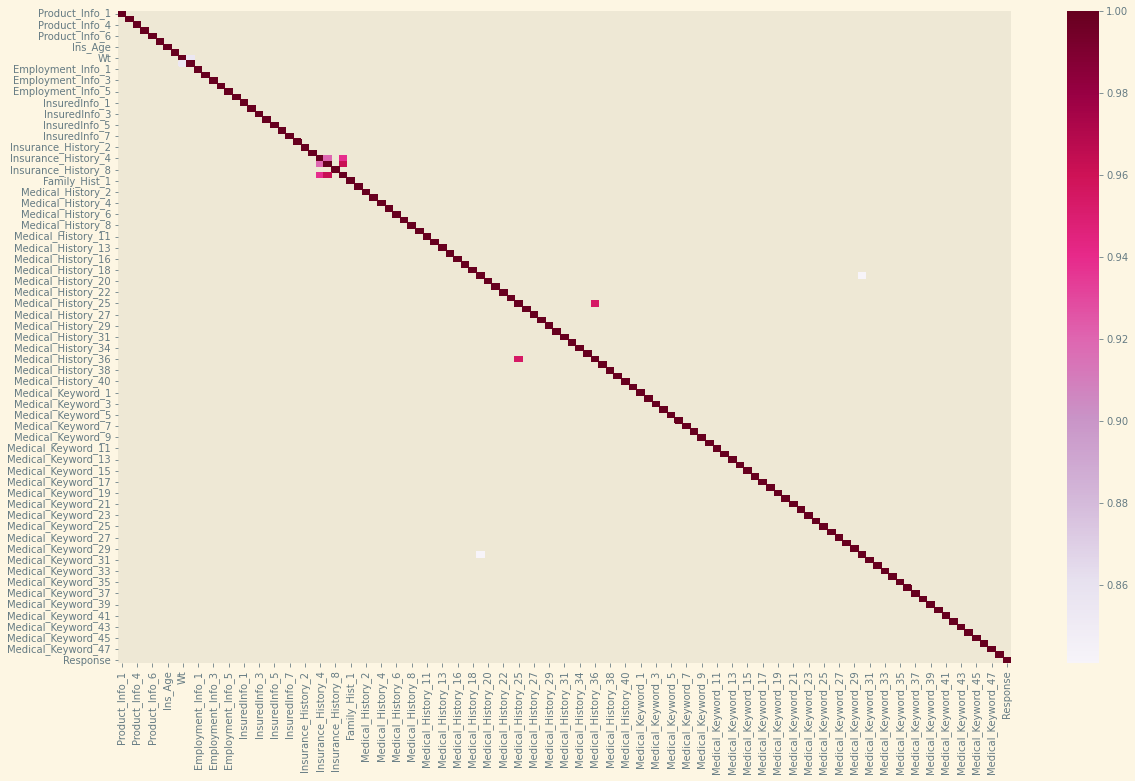

In [63]:
plt.figure(figsize=(20,12))
sns.heatmap(corr[corr>=.8], cmap="PuRd");

Splitting the training Data into X-Train and Y-train

In [64]:
X_train = train_df.drop(labels='Response', axis=1)
y_train = train_df['Response']
X_test = pd.read_csv('/content/test.csv', index_col='Id', on_bad_lines='skip')


Applying ETL on X_test

In [65]:
X_test = X_test.drop(cols_with_more_than_30_percent_null, axis=1)


In [66]:
X_test.shape

(19765, 117)

In [67]:
X_test=X_test.drop(['Product_Info_2'], axis =1)

In [68]:
X_test = X_test.fillna(X_test.median())
X_test.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
Id,,,,,,,,,,,,,,,,,,,,,
1,1,26,0.487179,2,3,1,0.611940,0.781818,0.338912,0.472262,...,0,0,0,0,0,0,0,0,0,0
3,1,26,0.076923,2,3,1,0.626866,0.727273,0.311715,0.484984,...,0,0,0,0,0,0,0,0,0,0
4,1,26,0.144667,2,3,1,0.582090,0.709091,0.320084,0.519103,...,0,0,0,0,0,0,0,0,0,0
9,1,26,0.151709,2,1,1,0.522388,0.654545,0.267782,0.486962,...,0,0,0,0,0,0,0,0,1,1
12,1,26,0.076923,2,3,1,0.298507,0.672727,0.246862,0.428718,...,0,0,0,0,0,0,0,0,0,0


Creating a y_test dataframe

In [69]:
y_test=[]
for i in range(len(X_test)):
    y_test.append(8)
y_test
y_test = pd.DataFrame (y_test, columns = ['Response'])
y_test.shape

(19765, 1)

Creating data model using Logistic Regression and plotting the classification report and confusion matrix

In [70]:
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print('------------------------------------------------------------')

print('Classification report for Logistic Regression ->')

print('------------------------------------------------------------')

print(classification_report(y_test, y_pred))

print('------------------------------------------------------------')

print('Confusion matrix ->')

print('------------------------------------------------------------')

print(confusion_matrix(y_test, y_pred))

print('------------------------------------------------------------')

------------------------------------------------------------
Classification report for Logistic Regression ->
------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           8       1.00      0.82      0.90     19765

    accuracy                           0.82     19765
   macro avg       0.33      0.27      0.30     19765
weighted avg       1.00      0.82      0.90     19765

------------------------------------------------------------
Confusion matrix ->
------------------------------------------------------------
[[    0     0     0]
 [    0     0     0]
 [ 1628  1971 16166]]
------------------------------------------------------------


In [71]:
y=[]
for i in range(len(y_pred)):
    r = int(round(y_pred[i],0))
    if r>8:
        r=8
    y.append(r)
print(y)
y_test_Logistic = pd.DataFrame (y, columns = ['Response'])
y_test_Logistic.shape
y_test_Logistic.to_excel('predicted_data_logistic.xlsx', index=False)
files.download('predicted_data_logistic.xlsx')

[1, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 1, 8, 8, 6, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 1, 8, 1, 8, 6, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 1, 8, 1, 8, 8, 1, 6, 6, 6, 8, 6, 8, 6, 8, 8, 8, 8, 8, 1, 1, 8, 8, 6, 6, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 6, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 6, 8, 1, 8, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 6, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 6, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 6, 8, 8, 6, 8, 6, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 1, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 6, 8, 8, 6, 8, 8, 8, 8, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Creating data model using XGBOOST Classifier and plotting the classification report and confusion matrix

<Figure size 14400x10800 with 0 Axes>

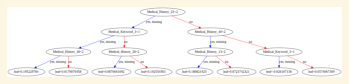

In [72]:
#fitting model on training data
from xgboost import plot_tree
# model = XGBClassifier(booster='gbtree',gamma = 1, learning_rate=0.2, max_depth=4, n_estimators=90, reg_lambda=1)
model = XGBClassifier(n_estimators=90)

model.fit(X_train,y_train)
pred = model.predict(X_test)
# print('Model accuracy score with XGBClassifier: {0:0.4f}'. format(accuracy_score(y_test, preds)))
plt.figure(figsize=(200, 150))
xgb.plot_tree(model)
plt.show()

In [73]:
print('------------------------------------------------------------')
print('Classification report for XGBoost Classifier ->')
print('------------------------------------------------------------')
print(classification_report(y_test, pred))
print('------------------------------------------------------------')
print('Confusion matrix ->')
print('------------------------------------------------------------')
print(confusion_matrix(y_test, pred))
print('------------------------------------------------------------')

------------------------------------------------------------
Classification report for XGBoost Classifier ->
------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       1.00      0.46      0.63     19765

    accuracy                           0.46     19765
   macro avg       0.12      0.06      0.08     19765
weighted avg       1.00      0.46      0.63     19765

------------------------------------------------------------
Confusion matrix ->
------------------------------------------------------------
[[   0    0    0    0    0    0    0 

In [74]:
x=[]
for i in range(len(pred)):
    r = int(round(pred[i],0))
    if r>8:
        r=8
    x.append(r)
print(x)
y_test_XGB = pd.DataFrame (x, columns = ['Response'])
y_test_XGB.shape

[7, 6, 6, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 7, 6, 8, 2, 8, 8, 8, 8, 6, 7, 8, 8, 6, 8, 7, 6, 5, 8, 6, 6, 8, 8, 5, 8, 2, 6, 8, 8, 1, 5, 8, 8, 8, 6, 8, 6, 8, 8, 8, 5, 5, 6, 8, 6, 5, 6, 6, 6, 5, 6, 7, 6, 8, 8, 8, 8, 8, 1, 7, 8, 6, 6, 8, 2, 8, 5, 8, 8, 6, 6, 8, 8, 5, 1, 7, 8, 8, 8, 6, 7, 5, 6, 6, 6, 8, 6, 8, 2, 7, 8, 8, 2, 6, 8, 8, 6, 6, 8, 8, 8, 8, 6, 6, 8, 8, 6, 7, 8, 7, 5, 6, 8, 8, 8, 8, 5, 8, 8, 1, 8, 8, 5, 6, 6, 6, 7, 8, 8, 8, 8, 8, 8, 5, 2, 5, 8, 6, 8, 6, 8, 6, 6, 6, 5, 8, 6, 8, 6, 5, 8, 6, 7, 8, 8, 8, 8, 8, 8, 6, 8, 8, 6, 8, 8, 7, 8, 8, 8, 6, 1, 8, 8, 6, 6, 6, 8, 2, 7, 8, 6, 8, 8, 1, 8, 6, 8, 7, 7, 8, 8, 5, 7, 5, 8, 8, 6, 6, 8, 7, 8, 8, 8, 8, 8, 7, 8, 8, 8, 6, 5, 6, 8, 7, 8, 6, 8, 8, 8, 6, 8, 8, 2, 8, 1, 8, 2, 8, 6, 7, 8, 8, 6, 7, 7, 8, 8, 8, 8, 8, 8, 6, 8, 8, 6, 7, 8, 6, 6, 6, 8, 8, 7, 8, 6, 6, 7, 8, 8, 8, 6, 7, 6, 8, 6, 7, 1, 5, 5, 2, 8, 8, 7, 8, 8, 8, 6, 8, 6, 8, 8, 6, 8, 6, 8, 8, 6, 7, 8, 8, 2, 6, 8, 8, 6, 2, 5, 8, 8, 6, 8, 8, 8, 8, 7, 7, 2, 6, 8, 8, 6, 8, 8, 6, 8, 8, 6, 7, 

(19765, 1)

Sample Submission file

In [75]:
y_test_XGB.to_excel('predicted_data_xgb.xlsx', index=False)
files.download('predicted_data_xgb.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Creating data model using Linear Regression and plotting the accuracy score and r-square, root mean squared error

In [76]:
model = LinearRegression() 
model.fit(X_train, y_train)               
preds = model.predict(X_test)
preds

array([3.43018068, 5.15510549, 4.92847323, ..., 3.21212731, 4.85540804,
       4.58972696])

Converting the predicted Values to rounded of Values

In [77]:
c=[]
for i in range(len(preds)):
    r = int(round(preds[i],0))
    if r>8:
        r=8
    c.append(r)
print(c)
y_test_Linear = pd.DataFrame (c, columns = ['Response'])
y_test_Linear.shape


[3, 5, 5, 6, 6, 6, 6, 7, 5, 6, 8, 7, 5, 7, 6, 6, 6, 6, 7, 3, 6, 7, 8, 7, 6, 5, 7, 7, 4, 7, 6, 5, 5, 7, 5, 5, 7, 7, 5, 8, 4, 4, 6, 7, 4, 5, 8, 5, 6, 5, 7, 4, 6, 7, 7, 7, 6, 6, 7, 3, 5, 4, 6, 4, 5, 5, 6, 6, 6, 6, 8, 5, 7, 3, 6, 8, 6, 4, 6, 4, 7, 5, 6, 6, 6, 4, 7, 7, 5, 4, 6, 4, 5, 8, 4, 6, 4, 5, 5, 6, 7, 5, 7, 4, 6, 8, 7, 4, 5, 6, 7, 3, 5, 6, 7, 6, 8, 5, 5, 6, 6, 6, 7, 7, 6, 4, 6, 7, 8, 7, 7, 5, 5, 6, 3, 6, 7, 5, 6, 5, 5, 6, 6, 6, 7, 6, 6, 6, 5, 3, 6, 6, 6, 8, 5, 8, 6, 4, 3, 4, 7, 3, 7, 6, 7, 7, 5, 6, 7, 5, 8, 7, 7, 8, 6, 5, 7, 6, 7, 7, 6, 7, 7, 8, 5, 2, 7, 6, 5, 5, 6, 7, 3, 7, 5, 4, 8, 7, 4, 6, 5, 7, 6, 6, 7, 6, 5, 6, 4, 7, 6, 5, 5, 7, 6, 5, 7, 6, 6, 7, 6, 7, 5, 6, 6, 7, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 2, 7, 1, 6, 3, 5, 3, 5, 6, 5, 5, 6, 6, 7, 7, 7, 6, 6, 7, 3, 6, 5, 6, 6, 6, 5, 5, 5, 6, 8, 5, 7, 5, 5, 7, 7, 6, 6, 5, 6, 6, 7, 4, 6, 4, 5, 6, 5, 8, 7, 7, 6, 7, 7, 5, 8, 4, 7, 7, 6, 6, 6, 6, 7, 5, 6, 7, 6, 4, 4, 6, 6, 5, 4, 6, 6, 6, 4, 4, 6, 7, 7, 6, 6, 2, 4, 7, 7, 4, 7, 6, 6, 6, 7, 6, 6, 

(19765, 1)

In [78]:
y_test_Linear.to_excel('predicted_data_Linear.xlsx', index=False)
files.download('predicted_data_Linear.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
x = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Response   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              4367.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):                        0.00
Time:                        22:30:35   Log-Likelihood:                     -1.2512e+05
No. Observations:               59381   AIC:                                  2.505e+05
Df Residuals:                   59265   BIC:                                  2.515e+05
Df Model:                         116                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Product_Info_1         -0.1345      0.052     -2.598      0.009      -0.236      -0.033
Product_Info_3         -0.0082      0.003     -3.139      0.002      -0.013      -0.003
Product_Info_4          0.8723      0.035     25.181      0.000       0.804       0.940
Product_Info_5         -0.2317      0.098     -2.365      0.018      -0.424      -0.040
Product_Info_6         -0.0405      0.011     -3.563      0.000      -0.063      -0.018
Product_Info_7          0.0676      0.028      2.397      0.017       0.012       0.123
Ins_Age                -0.7583      0.058    -12.972      0.000      -0.873      -0.644
Ht                      2.6908      0.540      4.983      0.000       1.632       3.749
Wt                     -4.6560      0.835     -5.578      0.000      -6.292      -3.020
BMI                    -2.7179      0.485     -5.599      0.000      -3.669      -1.767
Employment_Info_1       0.0661      0.118      0.558      0.577      -0.166       0.298
Employment_Info_2      -0.0033      0.003     -1.102      0.271      -0.009       0.003
Employment_Info_3      -0.1760      0.019     -9.430      0.000      -0.213      -0.139
Employment_Info_4      -0.5364      0.272     -1.975      0.048      -1.069      -0.004
Employment_Info_5       0.0628      0.037      1.680      0.093      -0.010       0.136
Employment_Info_6       0.0571      0.032      1.810      0.070      -0.005       0.119
InsuredInfo_1          -0.1504      0.022     -6.862      0.000      -0.193      -0.107
InsuredInfo_2          -0.9604      0.110     -8.724      0.000      -1.176      -0.745
InsuredInfo_3          -0.0031      0.003     -0.992      0.321      -0.009       0.003
InsuredInfo_4           0.0051      0.026      0.197      0.844      -0.046       0.056
InsuredInfo_5          -0.6575      0.037    -17.952      0.000      -0.729      -0.586
InsuredInfo_6           0.2540      0.027      9.544      0.000       0.202       0.306
InsuredInfo_7          -0.4033      0.035    -11.497      0.000      -0.472      -0.335
Insurance_History_1    -0.3552      0.080     -4.414      0.000      -0.513      -0.197
Insurance_History_2    -0.4126      0.025    -16.379      0.000      -0.462      -0.363
Insurance_History_3     0.1072      0.061      1.761      0.078      -0.012       0.227
Insurance_History_4     0.0572      0.029      1.976      0.048       0.000       0.114
Insurance_History_7     0.0707      0.043      1.659      0.097      -0.013       0.154
Insurance_History_8     0.1114      0.041      2.740      0.006       0.032       0.191
Insurance_History_9    -0.1023      0.086     -1.184      0.236      -0.272       0.067
Family_Hist_1           0.0301      0.017      1.733      0.083      -0.004     